https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import numpy as np

# 1.0 Leitura dos dados

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2.0 Pré-processamento

## 2.1 Checagem de valores nulos

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 2.2 Transformação variável Time
A variável time representa o tempo decorrido em segundos desde o primeiro registro de transação.
O valor mínimo dessa variável é 0 e o máximo 172792. Portanto, temos dados de transações gerados num período de 48h.

Transformaremos a variável para o formato 0h-23h:

Transações ocorridas entre meia noite e 1h da madrugada serão computadas como 0h;  
Transações ocorridas entre 1h e 2h da madrugada serão computadas como 1h e assim sucessivamente.

In [6]:
df['Time'] = df['Time']/3600

In [7]:
import math

In [8]:
df['Time'] = df['Time'].apply(lambda x: math.floor(x) if x < 24 else math.floor(x-24))

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,14.046470,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,5.835854,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,10.000000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,15.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,19.000000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,23.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# 3.0 Analise exploratória de dados

* 3.1 Em que hora do dia há maior ocorrência de transações?  e transações fraudulentas? 
* 3.2 Há alguma tendência no valor médio das transações fraudulentas de acordo com o horário do dia?  
* 3.3 Quantas transações fraudulentas foram registradas? e quantas transações comuns?  
* 3.4 Como estão distribuidos os dados de cada variável?  


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

## 3.1 Em que hora do dia há maior ocorrência de transações?  e transações fraudulentas? 

In [11]:
df_analise = pd.read_csv('creditcard.csv')

In [12]:
df_analise['Hora'] = df_analise['Time']/3600

In [13]:
df_analise['Dia'] = df_analise['Hora']/24

In [14]:
## Transformando as variáveis de hora e dia para numeros inteiros

In [15]:
import math

In [16]:
df_analise['Dia'] = df_analise['Dia'].apply(lambda x: 1 if x <= 1 else 2)

In [17]:
df_analise['Hora'] = df_analise['Hora'].apply(lambda x: math.floor(x) if x < 24 else math.floor(x-24))

In [18]:
df_analise.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hora,Dia
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727,14.046470,1.491631
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,5.835854,0.499931
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000,1.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,10.000000,1.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,15.000000,1.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,19.000000,2.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,23.000000,2.000000


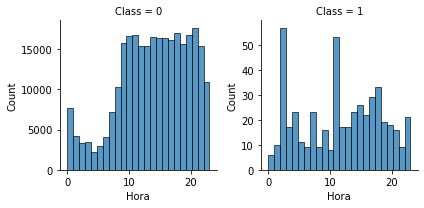

In [19]:
g = sns.FacetGrid(df_analise, col="Class", sharex = True, sharey = False, )
g.map_dataframe(sns.histplot, x = "Hora", bins = 24)

Observa-se que as transaçõs comuns tem um padrão:
   * Atingem o mínimo por volta das 04h da madrugada e crescem até atingir o pico ás 09h da manhã que se mantém até as 21h quando começa a cair o número de transações.
   
As transações fraudulentas não possui um padrão de distribuição, no entanto, é possível verificar que ocorrem majoritariamente em 2 períodos: 

   * As 03h da madrugada, quando não há muitas transações comuns ocorrendo.
   * As 11h da manhã. Embora seja um horário com alto número de transações comuns, é bastante anormal a queda do número de transações fraudulentas nos horários subjacentes 10h e 12h.

## 3.2 Há alguma tendência no valor médio das transações fraudulentas de acordo com o horário do dia?

In [20]:
table = pd.pivot_table(df_analise, values='Amount', index=['Hora'],
                    columns=['Class'], aggfunc=np.mean)
table

Class,0,1
Hora,,
0,60.136323,303.345000
1,62.481266,127.932000
2,70.101712,79.262807
3,52.264245,13.759412
4,77.141368,67.313043
5,50.387214,128.788182
6,64.957204,111.924444
7,67.652537,119.903478
8,88.807081,47.887778


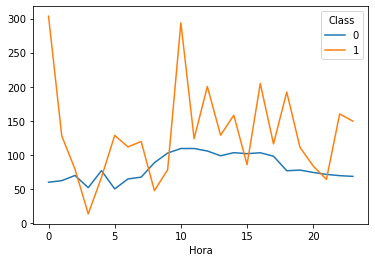

In [23]:
table.plot()

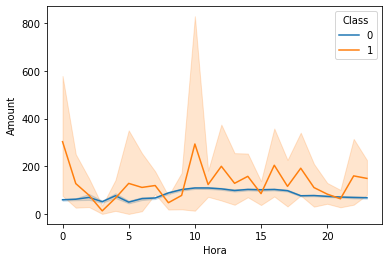

In [24]:
sns.lineplot(x="Hora", y="Amount",
             hue="Class",
             data=df_analise )

As transações comuns possuem uma média estável e inferior comparada as transações fraudulentas que possuem médias altas e com alto desvio padrão.

É possível observar um pico nos valores das transações fraudulentasas 0h e as 10h, mas isso pode ser efeito da alta variância dessas observações.

## 3.3 Quantas transações fraudulentas foram registradas? e quantas transações comuns?

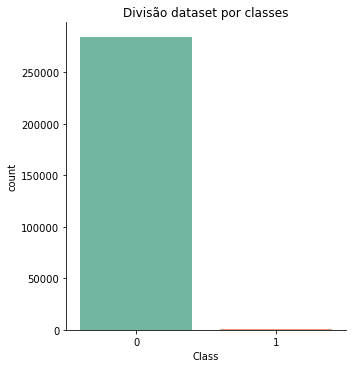

In [25]:
%matplotlib inline
sns.catplot(x="Class", kind="count", palette="Set2", data= df).set(title="Divisão dataset por classes")

In [26]:
#Contando quantos registros de fraudes existem:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Os dados são altamente desbalanceados, a base possui 284315 registros comuns e 492 registros de fraudes. Será necessário aplicar técnicas para o balanceamento.

## 3.4 Como estão distribuidos os dados de cada variável?

[Text(0.5, 1.0, 'Histograma de Tempo')]

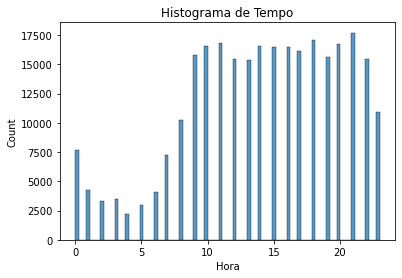

In [27]:
sns.histplot(data = df_analise, x = "Hora").set(title="Histograma de Tempo")

### 3.1.1 Histogramas por features

In [21]:
features = df.drop(columns=["Class"]).columns
features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [22]:
numero_plots = len(features)
numero_plots

30

In [103]:
fig, axs = plt.subplots(nrows=numero_plots, figsize = (300,300))

k=0
for i in features:
    sns.histplot(data = df, x = i, ax=axs[k]).set(title="Histograma" + " variavel " + i)
    k = k+1
    


A maioria das distribuições não são normais, além disso a escala varia muito de feature pra feature e isso pode afetar o desempenho de algorítmos que utilizam distância para classificar fraudes de transações normais. A fim de otimizar a performance dos algorítmos de Machine Learning iremos aplicar técnicas para aproximar os dados á uma distribuição normal e iremos padronizá-los com média = 0 e desvio padrão = 1)

## Valor da transação vs Transação fraudulenta/normal

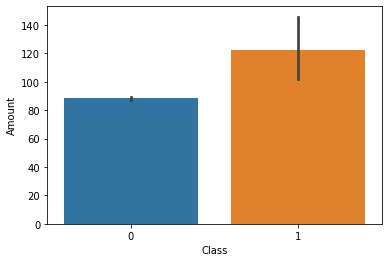

In [28]:
sns.barplot(x="Class", y="Amount", data=df)

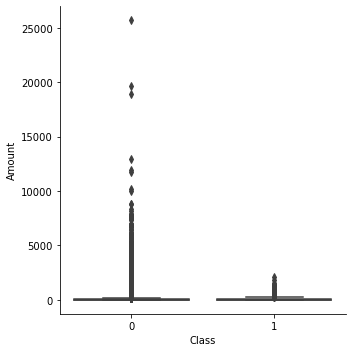

In [29]:
sns.catplot(x="Class", y="Amount", data=df, kind="box");

# 4 Teste de normalidade

In [23]:
len(df)

284807

Há cerca de 284807 registros, checaremos se é possível aplicar testes de normalidade considerando todos os registros com os

- Testes de Shapiro, Testes de D'Agostinho e Teste de Anderson
- Definimos valor de alfa = 0.05 para ter 95% de nivel de confiança

## 4.1 Shapiro Wilk

In [24]:
from scipy.stats import shapiro

In [25]:
_, p = shapiro(df['V1'])
p

C:\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

In [26]:
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição não normal


## 4.2 D'Agostinho

In [27]:
from scipy.stats import normaltest

In [28]:
_, p = normaltest(df['V1'])
p

0.0

In [29]:
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição não normal


## 4.3 Anderson

In [30]:
from scipy.stats import anderson

In [31]:
anderson(df['V1']).statistic

7053.7524257128825

In [32]:
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição não normal


Os testes de normalidade não performam bem quando há muitos registros, como a base de dados é desbalanceada, optaremos por técnicas de balanceamento. Com os dados balanceados (50% de cada classe) será atingido cerca de 1000 registros. 

Após o balanceamento aplicaremos as técnicas para aproximar os dados para uma distribuição normal seguido da sua padronização para media = 0 e desvio padrão = 1

## 4.4 Testes D'Agostinho com dados aleatórios 1500 registros

In [33]:
from scipy import stats
rng = np.random.default_rng()
pts = 1500
a = rng.normal(0, 1, size=pts)
b = rng.normal(2, 1, size=pts)
x = np.concatenate((a, b))
k2, p = stats.normaltest(x)
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 1.39296e-08
The null hypothesis can be rejected


In [34]:
from scipy import stats
rng = np.random.default_rng()
pts = 1500
a = rng.normal(0, 1, size=pts)
b = rng.normal(2, 1, size=pts)
x = np.concatenate((a, b))
k2, p = shapiro(x)
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 6.15255e-08
The null hypothesis can be rejected


## 4.5 Balanceamento dos dados

In [35]:
from imblearn.under_sampling import NearMiss

In [36]:
X = df.drop(columns=['Class'])
y = df['Class']

In [37]:
nr = NearMiss()
X, y = nr.fit_resample(X, y)

In [38]:
X.shape, y.shape

((984, 30), (984,))

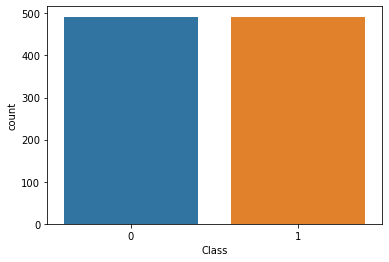

In [37]:
ax = sns.countplot(x=y)

## 4.6 Teste normalidade nos dados balanceados - Shapiro Wilk

In [39]:
features_normal = []
features_nao_normal = []
p_values_shapiro = []
p_values_dagostinho = []

for i in features:
    k2, p = shapiro(X[i])
    _, p2 = normaltest(X[i])
    p_values_shapiro.append(p)
    p_values_dagostinho.append(p2)
    
    alpha = 0.05
    
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        features_nao_normal.append(i) ## "The null hypothesis can be rejected")
    else:
        features_normal.append(i) ##"The null hypothesis cannot be rejected")

In [40]:
len(features_nao_normal) , len(features_normal)

(30, 0)

In [41]:
df_p_values = pd.DataFrame(p_values_shapiro, columns = ['p_value'])
df_p_values.describe()

,p_value
count,3.000000e+01
mean,1.337917e-04
std,7.328074e-04
min,0.000000e+00
25%,4.979483e-40
50%,7.798615e-34
75%,1.389766e-26
max,4.013751e-03


In [42]:
features_normal

[]

A única feature que contem dados distribuidos numa Gaussiana é a V13, aplicaremos 3 técnicas para normalizar as outras 29 features não normais a fim de aproximarmos de uma normal e aumentar a performance dos algorítmos de ML

# 5 INVESTIGAÇÃO APENAS - (NAO APLICAR) - Técnicas para aproximação de distribuições normais

Fonte: https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16

## 5.1 Escalando os dados

In [192]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,76866.0,1.257227,0.408096,0.319266,0.685011,-0.302937,-1.052552,0.136991,-0.245655,-0.079491,...,-0.033053,-0.279430,-0.770134,0.119789,0.360130,0.241921,0.092261,-0.018228,0.032361,1.78
1,76868.0,1.254775,0.375340,0.311959,0.691077,-0.343494,-1.065252,0.110222,-0.222721,-0.017278,...,-0.057911,-0.283275,-0.803506,0.124643,0.354395,0.226835,0.093208,-0.021100,0.031686,2.69
2,76870.0,-1.050697,1.500753,0.846326,-0.282956,0.059866,-0.561182,0.484517,0.181547,0.081544,...,0.457988,-0.335560,-0.780232,-0.027029,-0.090180,-0.022896,0.091830,0.547241,0.278780,1.29
3,76866.0,1.245537,0.419648,0.312943,1.111459,-0.205612,-0.950912,0.267398,-0.274685,-0.127708,...,-0.098066,0.035687,0.186705,-0.107300,0.417887,0.712330,-0.330843,0.018576,0.021871,3.99
4,76870.0,1.261137,0.304662,0.527018,0.612765,-0.411488,-0.972770,0.112838,-0.248052,-0.068454,...,-0.044989,-0.249081,-0.683649,0.126936,0.395307,0.243448,0.092344,-0.024149,0.020589,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [193]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,90393.878049,-2.382994,2.115600,-3.519994,2.296550,-1.459575,-0.788125,-2.797100,0.295290,-1.296937,...,0.185891,0.309421,-0.008665,-0.026530,-0.030337,0.031152,0.022708,0.087085,0.046227,65.352470
std,47778.797490,5.503503,3.497487,6.216836,3.169148,4.227923,1.667629,5.833749,4.890868,2.327313,...,1.041477,2.801522,1.168185,1.167412,0.560434,0.663162,0.429865,1.020747,0.425555,190.196997
min,406.000000,-30.552380,-8.402154,-31.103685,-4.067605,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-2.085605,0.000000
25%,53709.750000,-2.871640,0.189965,-5.084967,-0.031784,-1.638023,-1.566318,-3.094485,-0.187299,-2.331368,...,-0.198984,-0.225145,-0.583333,-0.216472,-0.379825,-0.305045,-0.270092,-0.054257,-0.053800,1.000000
50%,77183.500000,-0.732607,1.131643,-1.446699,1.314843,-0.241534,-0.733544,-0.628802,0.158687,-0.650814,...,-0.012592,0.101741,-0.010150,-0.028799,0.025828,0.058301,0.027553,0.060864,0.035125,7.645000
75%,143449.250000,1.080413,2.936794,0.372924,4.229802,0.616558,-0.097443,0.276551,0.912601,0.116000,...,0.388452,0.612836,0.546494,0.182499,0.385643,0.416734,0.280840,0.466568,0.226970,23.605000
max,170348.000000,2.313171,22.057729,3.541039,12.114672,11.095089,6.474115,5.802537,20.007208,6.472920,...,11.059004,27.202839,8.361985,5.466230,3.261279,2.208209,2.745261,3.052358,1.779364,2125.870000


há dados negativos, não podemos aplicar logarítmo direto, vamos escalar todas features em um range entre 0 e 1

In [162]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
    
for i in features:
    
    transformados = X[i].to_numpy()
    transformados = transformados.reshape(-1,1)
    
    dados = scaler.fit_transform(transformados)
    X[i] = dados

In [163]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.449918,0.967871,0.289241,0.907005,0.293693,0.656692,0.415649,0.885219,0.668266,0.670849,...,0.269644,0.450359,0.470571,0.783725,0.451506,0.718692,0.319383,0.702343,0.547990,0.000837
1,0.449930,0.967796,0.288166,0.906794,0.294068,0.655471,0.414663,0.884677,0.668641,0.673974,...,0.268007,0.450283,0.468636,0.783921,0.450422,0.716534,0.319626,0.702064,0.547816,0.001265
2,0.449942,0.897648,0.325113,0.922219,0.233876,0.667620,0.453798,0.892260,0.675263,0.678938,...,0.301976,0.449237,0.469986,0.777786,0.366370,0.680806,0.319272,0.757158,0.611748,0.000607
3,0.449918,0.967515,0.289620,0.906823,0.320045,0.659624,0.423540,0.887861,0.667790,0.668427,...,0.265363,0.456662,0.526043,0.774539,0.462426,0.785992,0.210837,0.705910,0.545276,0.001877
4,0.449942,0.967990,0.285845,0.913002,0.289228,0.653423,0.421843,0.884730,0.668226,0.671403,...,0.268858,0.450966,0.475585,0.784014,0.458157,0.718911,0.319404,0.701769,0.544945,0.000842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.992903,0.870957,0.312799,0.767371,0.359461,0.618634,0.341277,0.864558,0.683710,0.571112,...,0.354322,0.471520,0.496714,0.804745,0.327669,0.760980,0.497973,0.732482,0.577902,0.183454
980,0.994110,0.971563,0.318174,0.753345,0.338608,0.679147,0.394377,0.853814,0.676360,0.618209,...,0.286710,0.463360,0.516856,0.772988,0.368097,0.758744,0.485421,0.741833,0.587907,0.000358
981,0.994133,0.909044,0.312822,0.833893,0.280301,0.632066,0.497106,0.837170,0.692111,0.642077,...,0.288148,0.470984,0.563576,0.786603,0.389483,0.578257,0.416575,0.741441,0.589905,0.036639
982,0.997752,0.834873,0.295077,0.741930,0.363651,0.640497,0.268837,0.837711,0.689631,0.592844,...,0.291987,0.467613,0.499612,0.760429,0.348697,0.637132,0.451210,0.789888,0.473977,0.115247


In [164]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,0.529521,0.857110,0.345299,0.796187,0.393279,0.621855,0.436178,0.825776,0.677126,0.609692,...,0.284060,0.462136,0.514717,0.777806,0.377684,0.688539,0.301539,0.712551,0.551578,0.030742
std,0.281148,0.167455,0.114823,0.179445,0.195841,0.127345,0.129470,0.118188,0.080111,0.116909,...,0.068576,0.056030,0.067725,0.047224,0.105956,0.094875,0.110280,0.098949,0.110106,0.089468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313658,0.842242,0.282080,0.751015,0.249398,0.616480,0.375761,0.819752,0.669222,0.557729,...,0.258718,0.451445,0.481401,0.770122,0.311610,0.640440,0.226422,0.698850,0.525698,0.000470
50%,0.451786,0.907326,0.312995,0.856032,0.332614,0.658542,0.440416,0.869705,0.674889,0.642149,...,0.270991,0.457983,0.514631,0.777714,0.388303,0.692423,0.302782,0.710010,0.548706,0.003596
75%,0.841718,0.962491,0.372258,0.908554,0.512747,0.684388,0.489801,0.888047,0.687238,0.680669,...,0.297398,0.468205,0.546902,0.786262,0.456330,0.743702,0.367762,0.749338,0.598343,0.011104
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Substituiremos simbolicamente os valores = 0 por valores = 0.01

In [166]:
for i in features:
    X[i] = X[i].apply(lambda x: x if x > 0 else 0.01)


In [167]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,0.529531,0.857120,0.345309,0.796198,0.393290,0.621865,0.436188,0.825787,0.677136,0.609702,...,0.284070,0.462147,0.514778,0.777816,0.377695,0.688549,0.301549,0.712592,0.551588,0.031107
std,0.281129,0.167403,0.114793,0.179401,0.195820,0.127295,0.129437,0.118118,0.080025,0.116857,...,0.068535,0.055947,0.067264,0.047058,0.105920,0.094802,0.110253,0.098658,0.110055,0.089362
min,0.000388,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.005722,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000705,0.010000,0.010000,0.000005
25%,0.313658,0.842242,0.282080,0.751015,0.249398,0.616480,0.375761,0.819752,0.669222,0.557729,...,0.258718,0.451445,0.481401,0.770122,0.311610,0.640440,0.226422,0.698850,0.525698,0.000546
50%,0.451786,0.907326,0.312995,0.856032,0.332614,0.658542,0.440416,0.869705,0.674889,0.642149,...,0.270991,0.457983,0.514631,0.777714,0.388303,0.692423,0.302782,0.710010,0.548706,0.004229
75%,0.841718,0.962491,0.372258,0.908554,0.512747,0.684388,0.489801,0.888047,0.687238,0.680669,...,0.297398,0.468205,0.546902,0.786262,0.456330,0.743702,0.367762,0.749338,0.598343,0.011104
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5.2 Aplicando logarítmo para aproximação de uma normal

In [168]:
for i in features:
    dados = np.log(X[i])
    X[i] = dados


In [169]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,9.840000e+02,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,9.840000e+02,984.000000,...,984.000000,984.000000,9.840000e+02,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,-8.612988e-01,-0.196440,-1.111895,-0.285491,-1.058581,-0.518362,-0.882935,-0.210240,-4.080964e-01,-0.524275,...,-1.288390,-0.781970,-6.871356e-01,-0.256658,-1.027218,-0.386466,-1.287395,-0.361986,-0.625798,-5.513024
std,8.100441e-01,0.380020,0.324054,0.449278,0.518591,0.376783,0.361508,0.248036,2.652574e-01,0.303574,...,0.270912,0.182987,3.225798e-01,0.156641,0.373607,0.199330,0.503442,0.311166,0.298269,2.035377
min,-7.853558e+00,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170e+00,-5.163403,...,-4.605170,-4.605170,-4.605170e+00,-4.605170,-4.605170,-4.605170,-7.257183,-4.605170,-4.605170,-12.267107
25%,-1.159451e+00,-0.171688,-1.265565,-0.286329,-1.388707,-0.483730,-0.978801,-0.198754,-4.016400e-01,-0.583883,...,-1.352016,-0.795301,-7.310550e-01,-0.261206,-1.166003,-0.445599,-1.485353,-0.358319,-0.643029,-7.513973
50%,-7.945456e-01,-0.097253,-1.161568,-0.155448,-1.100774,-0.417727,-0.820036,-0.139601,-3.932075e-01,-0.442935,...,-1.305669,-0.780924,-6.643056e-01,-0.251396,-0.945969,-0.367559,-1.194742,-0.342477,-0.600193,-5.465824
75%,-1.723102e-01,-0.038231,-0.988167,-0.095901,-0.667974,-0.379231,-0.713756,-0.118731,-3.750753e-01,-0.384679,...,-1.212684,-0.758850,-6.034860e-01,-0.240466,-0.784539,-0.296115,-1.000319,-0.288565,-0.513592,-4.500513
max,-1.110223e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.110223e-16,0.000000,...,0.000000,0.000000,-1.110223e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 5.4 Novos testes de normalidade

In [181]:
features_normal2 = []
features_nao_normal2 = []
p_values2 = []

for i in features:
    k2, p = shapiro(X[i])
    p_values2.append(p)
    alpha = 0.05
    
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        features_nao_normal2.append(i) ## "The null hypothesis can be rejected")
    else:
        features_normal2.append(i) ##"The null hypothesis cannot be rejected")

In [182]:
len(features_nao_normal) , len(features_normal), len(features_nao_normal2) , len(features_normal2)

(29, 1, 30, 0)

In [183]:
df_p_values2 = pd.DataFrame(p_values2, columns = ['p_value'])
df_p_values.mean(), df_p_values.std(), df_p_values2.mean(), df_p_values2.std()

(p_value    0.002738
 dtype: float64,
 p_value    0.014999
 dtype: float64,
 p_value    9.100407e-14
 dtype: float64,
 p_value    4.809136e-13
 dtype: float64)

Não se justifica a aplicação de toda a etapa 5, uma vez que os p_values após todo o processamento da etapa 5 foram menores com relação aos p_values anterior ao processamento.

Na prática, quanto menor o p_value maior é a certeza da rejeição da hipotese nula (H0), em resumo maior a certeza que os dados não estão em uma normal.

Dessa forma, utilizaremos os dados sem aplicar o processamento realizado no tópico 5.

# 6.0 Aproximando a distribuição das variaveis Amount e Time para uma normal

In [43]:
df_p_values

,p_value
0,6.503933e-22
1,2.606415e-42
2,6.186581e-38
3,1.712223e-39
4,2.888801e-32
5,4.229147e-40
6,1.110114e-26
7,1.367107e-41
8,0.000000e+00
9,1.305069e-34


Como podemos observar a primeira e ultima feature apresenta um p_value muito baixo, iremos reprocessá-los a fim de aproximar os dados á uma normal.

Faremos isso para as features Time e Ammount uma vez são as que possuem uma escala maior com relação as outras.

In [44]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,12.620935,-1.798795,2.093868,-3.644670,2.723588,-1.497109,-1.091938,-2.683842,0.234318,-1.384659,...,0.139296,0.288359,-0.170524,-0.046170,-0.086028,0.255033,0.017292,0.087965,0.055986,61.646748
std,5.025430,5.646179,3.403121,6.072804,2.737889,4.149114,1.383216,5.856363,4.817353,2.140933,...,0.980803,2.768758,1.101299,1.120008,0.455672,0.628446,0.389582,0.976943,0.387724,191.262945
min,0.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000
25%,11.000000,-2.339076,0.419094,-5.074851,0.724380,-1.517992,-1.576412,-3.031843,-0.208247,-2.205996,...,-0.137423,-0.211729,-0.657529,-0.185889,-0.407858,0.054876,-0.294562,-0.023403,0.018631,0.990000
50%,13.000000,1.146946,0.697590,-0.726994,1.320221,-0.040766,-0.952911,0.015314,-0.033780,-0.391540,...,-0.064141,-0.038273,-0.189688,-0.077322,-0.051063,0.346088,0.067263,0.030539,0.038432,1.000000
75%,15.000000,1.237007,2.716862,-0.239127,4.175332,0.338291,-0.508109,0.239349,0.625673,-0.089636,...,0.284624,0.590908,0.146348,0.118948,0.265573,0.627385,0.329931,0.394804,0.148093,9.230000
max,23.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000


In [45]:
X['Amount2'] = np.log(X['Amount']+1)

In [46]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Amount2
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,12.620935,-1.798795,2.093868,-3.644670,2.723588,-1.497109,-1.091938,-2.683842,0.234318,-1.384659,...,0.288359,-0.170524,-0.046170,-0.086028,0.255033,0.017292,0.087965,0.055986,61.646748,1.769959
std,5.025430,5.646179,3.403121,6.072804,2.737889,4.149114,1.383216,5.856363,4.817353,2.140933,...,2.768758,1.101299,1.120008,0.455672,0.628446,0.389582,0.976943,0.387724,191.262945,1.888687
min,0.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,0.000000
25%,11.000000,-2.339076,0.419094,-5.074851,0.724380,-1.517992,-1.576412,-3.031843,-0.208247,-2.205996,...,-0.211729,-0.657529,-0.185889,-0.407858,0.054876,-0.294562,-0.023403,0.018631,0.990000,0.688135
50%,13.000000,1.146946,0.697590,-0.726994,1.320221,-0.040766,-0.952911,0.015314,-0.033780,-0.391540,...,-0.038273,-0.189688,-0.077322,-0.051063,0.346088,0.067263,0.030539,0.038432,1.000000,0.693147
75%,15.000000,1.237007,2.716862,-0.239127,4.175332,0.338291,-0.508109,0.239349,0.625673,-0.089636,...,0.590908,0.146348,0.118948,0.265573,0.627385,0.329931,0.394804,0.148093,9.230000,2.325319
max,23.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,7.662407


## 6.1 Validação normalidade - Amount

In [47]:
k2, p1 = shapiro(X['Amount'])
k2, p2 = shapiro(X['Amount2'])
p1,p2

(0.0, 1.2762841441673143e-38)

O valor de P aumentou, no entanto, ainda é maior que alfa, sendo assim embora a distribuição ainda não seja normal houve uma aproximação.

## 6.2 Validação normalidade - Time

In [48]:
X['Time2'] = np.log(X['Time']+1)

In [49]:
k2, p1 = shapiro(X['Time'])
k2, p2 = shapiro(X['Time2'])
p1,p2

(6.503932738654966e-22, 8.336997097848111e-36)

O valor de P diminuiu, isso significa que os dados se afastaram de uma distribuição normal, dessa forma manteremos a variável time como está atualmente.

## 6.3 Alteração no dataframe

In [50]:
X['Amount'] = X['Amount2']

In [51]:
X = X.drop(columns=['Time2','Amount2'])

In [52]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,13,1.174266,0.576490,-0.501829,1.113923,0.438800,-0.274651,0.085771,0.093558,-0.245800,...,-0.144457,-0.016537,-0.002184,-0.140296,-0.457164,0.612806,-0.292877,0.043768,0.039360,0.693147
1,13,1.174064,0.556525,-0.507559,1.116601,0.414206,-0.281208,0.067073,0.109215,-0.204072,...,-0.162114,-0.019706,-0.024754,-0.136988,-0.464710,0.603481,-0.291954,0.041966,0.038768,0.693147
2,13,1.174519,0.601446,-0.494666,1.110575,0.469544,-0.266455,0.109142,0.073987,-0.297960,...,-0.122386,-0.012576,0.026028,-0.144431,-0.447733,0.624462,-0.294032,0.046020,0.040100,0.693147
3,12,1.176217,0.493799,-0.401158,1.077968,0.349939,-0.236829,0.046478,0.114931,-0.182292,...,-0.174918,-0.004885,0.011902,-0.131633,-0.442140,0.600983,-0.291857,0.038079,0.032346,0.693147
4,13,1.219799,0.586881,-0.360079,1.121923,0.217976,-0.692569,0.166128,-0.058740,-0.271957,...,-0.103665,-0.025401,-0.051936,-0.168516,-0.113809,0.694633,-0.323640,0.025627,0.037085,0.693147


## 6.4 Criando novo DF processado: X_producao e y_producao

In [53]:
X_producao = df.drop(columns=['Class'])
y_producao = df['Class']

In [54]:
X_producao.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [55]:
X_producao['Amount2'] = np.log(X_producao['Amount']+1)

In [56]:
X_producao['Amount'] = X_producao['Amount2']

In [57]:
X_producao = X_producao.drop(columns=['Amount2'])

In [58]:
X_producao.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


In [59]:
X_producao.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,14.046470,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,3.152188
std,5.835854,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.656648
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,10.000000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,1.887070
50%,15.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,3.135494
75%,19.000000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,4.358822
max,23.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,10.153941


# 7.0 Modelos de Machine Learning

# 7.1 Seleção de modelos preliminar c/ balanceamento 50/50:

In [60]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

C:\Users\HP ZBook 15\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [61]:
nr = NearMiss(sampling_strategy=0.5)
X, y = nr.fit_resample(X_producao, y_producao)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:02<00:00,  9.91it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.98               0.97     0.97      0.98   
XGBClassifier                      0.98               0.97     0.97      0.98   
RandomForestClassifier             0.98               0.97     0.97      0.98   
DecisionTreeClassifier             0.97               0.97     0.97      0.97   
ExtraTreesClassifier               0.98               0.97     0.97      0.98   
BaggingClassifier                  0.97               0.96     0.96      0.97   
LinearSVC                          0.97               0.96     0.96      0.97   
GaussianNB                         0.97               0.96     0.96      0.97   
SVC                                0.97               0.95     0.95      0.97   
AdaBoostClassifier                 0.96               0.95     0.95      0.96   
PassiveAggressiveClassifier 

Os seguintes modelos serão selecionados para procura de hyperparâmetros e melhor fatores de balanceamento pré-treino:
    
LGBMClassifier;  
XGBClassifier;  
RandomForestClassifier;   
DecisionTreeClassifier;  
ExtraTreesClassifier;  
BaggingClassifier;  
LinearSVC;  
GaussianNB;  

## 7.1  Arvores de Decisão - Avaliação dados de teste

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, KFold

In [61]:
recall_1 = make_scorer(recall_score)

In [62]:
scoring = {"AUC": "roc_auc", "Recall": recall_1}

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [64]:
resultados = []

for i in range(10):
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    gs = GridSearchCV(
        DecisionTreeClassifier(random_state=i),
        param_grid={"min_samples_split": range(2, 13, 1), "max_depth": range(8 ,12, 1)},
        scoring=scoring,
        refit="Recall",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
    )
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    recall_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    
    #Calculando o recall da classe 1 e armazenando para testes estatísticos
    recall_value = recall_score(y_test, y_test_pred, pos_label=1)
    
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['min_samples_split'],hyperparams['max_depth'],recall_treino,recall_value,accuracy_teste,f1_teste,auc_teste]))
    

0
1
2
3
4
5
6
7
8
9


In [65]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['iteracao', 'min_samples_split','max_depth','recall_treino','recall_teste','acuracia_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'recall_teste', ascending = False)

,iteracao,min_samples_split,max_depth,recall_treino,recall_teste,acuracia_teste,f1_teste,auc_teste
7,7.0,12.0,9.0,0.966114,0.939189,0.945946,0.945578,0.945946
8,8.0,10.0,10.0,0.956727,0.939189,0.945946,0.945578,0.945946
0,0.0,2.0,8.0,0.961254,0.932432,0.942568,0.941980,0.942568
2,2.0,2.0,8.0,0.945993,0.932432,0.929054,0.929293,0.929054
9,9.0,10.0,11.0,0.954243,0.932432,0.942568,0.941980,0.942568
6,6.0,2.0,10.0,0.960452,0.925676,0.925676,0.925676,0.925676
1,1.0,2.0,9.0,0.951823,0.918919,0.935811,0.934708,0.935811
3,3.0,2.0,9.0,0.959488,0.918919,0.922297,0.922034,0.922297
4,4.0,2.0,10.0,0.966303,0.918919,0.935811,0.934708,0.935811
5,5.0,6.0,9.0,0.958700,0.918919,0.935811,0.934708,0.935811


Ao buscar pelos melhores hiperparâmetros encontramos valores de recall da classe 1 superiores a 0,94 nos experimentos 0,7 e 8.

Dentre todos os experimentos que atingiram alto recall para classe 1, os experimentos 0,7 e 8 foram também os que atingiram maiores valores de f1_score e área sobre a curva ROC.

Dessa forma, iremos avaliar se há diferença estatística ao utilizar modelos com os hyperparâmetros:
    
    min_samples_split = 12 e max_depth = 9
    min_samples_split = 10 e max_depth = 10
    min_samples_split = 2 e max_depth = 8

### 7.1.1 Avaliando diferença estatísticas entre os modelos de Decision Tree

In [66]:
recall_1 = make_scorer(recall_score)

In [67]:
scoring = {"AUC": "roc_auc"}

In [68]:
resultados_dt_12_9 = []
resultados_dt_12_9_300 = []

resultados_dt_10_10 = []
resultados_dt_10_10_300 = []

resultados_dt_2_8 = []
resultados_dt_2_8_300 = []


for i in range(30):
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    dt1 = DecisionTreeClassifier(random_state=i, min_samples_split = 12, max_depth = 9)
    dt2 = DecisionTreeClassifier(random_state=i, min_samples_split = 10, max_depth = 10)
    dt3 = DecisionTreeClassifier(random_state=i, min_samples_split = 2, max_depth = 8)
    
    
    # Aplicação dos kfolds para avaliação estatística
    scores1 = cross_val_score(dt1, X_train, y_train, cv = kfold, scoring = "roc_auc")
    scores2 = cross_val_score(dt2, X_train, y_train, cv = kfold, scoring = "roc_auc")
    scores3 = cross_val_score(dt3, X_train, y_train, cv = kfold, scoring = "roc_auc")
    
    #Armazenando os resultados de cada árvore
    resultados_dt_12_9.append(scores1.mean())
    resultados_dt_12_9_300.append(scores1)
    
    resultados_dt_10_10.append(scores2.mean())
    resultados_dt_10_10_300.append(scores2)
    
    resultados_dt_2_8.append(scores3.mean())
    resultados_dt_2_8_300.append(scores3)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


### 7.1.2 Teste de normalidade Shapiro Wilk: usar testes paramétricos ou não paramétricos?

In [69]:
from scipy.stats import shapiro

In [70]:
_, p = shapiro(resultados_dt_12_9)
p
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


In [71]:
_, p = shapiro(resultados_dt_12_9_300)
p
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição não normal


In [72]:
_, p = shapiro(resultados_dt_10_10)
p
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


In [73]:
_, p = shapiro(resultados_dt_10_10_300)
p
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição não normal


In [74]:
_, p = shapiro(resultados_dt_2_8)
p
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


In [75]:
_, p = shapiro(resultados_dt_2_8_300)
p
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição não normal


Conforme observado, quando utilizamos a média dos roc_auc sobre os 10 kfolds aproximamos a distribuição á uma Gaussiana. Isso é uma implicação do Teorema Central do Limite. 

Assim sendo, utilizaremos apenas os 30 registros com as médias das ROC_AUC para avaliar a diferença estatística.

### 7.1.3 Anova

Avaliaremos a diferença estatística por meio da ANOVA com:
    
    Alfa = 5%
    Nivel de confiança = 95%
    H0: Não há diferença estatística entre os dados

In [76]:
from scipy.stats import f_oneway

In [77]:
_, p = f_oneway(resultados_dt_12_9, resultados_dt_10_10, resultados_dt_2_8)
p

alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Os dados possuem diferença estatística significante')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada. Os dados possuem diferença estatística significante


### 7.1.4 Teste de Tukey

Avaliaremos a diferença estatística 2 a 2 com a hipotese nula:

H0: Não há diferença estatística entre os dados

In [78]:
lista_12_9 = ['12_9' for i in range(len(resultados_dt_12_9))]
lista_10_10 = ['10_10' for i in range(len(resultados_dt_10_10))]
lista_2_8 = ['2_8' for i in range(len(resultados_dt_2_8))]

lista_algoritmos = lista_12_9 + lista_10_10 + lista_2_8
len(lista_algoritmos)

90

In [79]:
resultados_algoritmos = {'auc': np.concatenate([resultados_dt_12_9, resultados_dt_10_10, resultados_dt_2_8]),
                         'algoritmo': lista_algoritmos}

In [80]:
import pandas as pd
resultados_algoritmos = pd.DataFrame(resultados_algoritmos)
resultados_algoritmos

,auc,algoritmo
0,0.968792,12_9
1,0.960687,12_9
2,0.954827,12_9
3,0.971719,12_9
4,0.961907,12_9
...,...,...
85,0.963487,2_8
86,0.957741,2_8
87,0.959588,2_8
88,0.953092,2_8


In [81]:
df_avaliacao = resultados_algoritmos.groupby('algoritmo').agg({'auc':np.mean})
df_avaliacao

,auc
algoritmo,
10_10,0.965455
12_9,0.966757
2_8,0.955594


In [82]:
from statsmodels.stats.multicomp import MultiComparison

In [83]:
compara_grupos = MultiComparison(resultados_algoritmos['auc'], resultados_algoritmos['algoritmo'])

In [84]:
teste = compara_grupos.tukeyhsd()
print(teste)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 10_10   12_9   0.0013 0.5538 -0.0017  0.0043  False
 10_10    2_8  -0.0099  0.001 -0.0129 -0.0069   True
  12_9    2_8  -0.0112  0.001 -0.0142 -0.0082   True
----------------------------------------------------


In [85]:
df_avaliacao

,auc
algoritmo,
10_10,0.965455
12_9,0.966757
2_8,0.955594


Segundo o teste de Tukey há diferença estatística entre os modelos 10_10 e 2_8, e os pares 12_9  e 2_8.

Sendo o modelo 2_8 o pior dentre os 3 avaliados.

Não há diferença estatísticas entre os modelos 10_10 e 12_9, dessa forma manteremos o modelo 12_9

### 7.1.5 Arvore de Decisão - Melhor modelo de testes

In [86]:
arvore_decisao = DecisionTreeClassifier(max_depth=9, min_samples_split=12, random_state=29)
arvore_decisao.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=12, random_state=29)

In [87]:
arvore_decisao

DecisionTreeClassifier(max_depth=9, min_samples_split=12, random_state=29)

In [ ]:
print("Classification Report Test:\n",classification_report(y_test,y_test_pred))
print("")
print("Classification DF:\n",classification_report(y_df,y_df_pred))
print("")
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Confusion Matrix DF:\n",confusion_matrix(y_df,y_df_pred))
print("")

### 7.1.6 Previsão do modelo nos dados de produção

In [135]:
y_producao_pred = arvore_decisao.predict(X_producao)

In [136]:
print("Classification Report Dados de Producao:\n",classification_report(y_producao,y_producao_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_producao,y_producao_pred))
print("")

Classification Report Dados de Producao:
               precision    recall  f1-score   support

           0       1.00      0.36      0.53    284315
           1       0.00      0.97      0.01       492

    accuracy                           0.36    284807
   macro avg       0.50      0.67      0.27    284807
weighted avg       1.00      0.36      0.53    284807


Confusion Matrix Dados de Producao:
 [[102085 182230]
 [    14    478]]



In [141]:
recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
recall_prod

0.9715447154471545

In [142]:
accuracy_prod = accuracy_score(y_producao, y_producao_pred)
accuracy_prod

0.36011404214081816

In [143]:
f1_prod = f1_score(y_producao, y_producao_pred)
f1_prod

0.005218340611353711

In [144]:
auc_prod = roc_auc_score(y_producao, y_producao_pred)
auc_prod

0.6653003460463882

Podemos observar que o algorítmo aprendeu a classificar fraudes, no entanto, há uma alta taxa de falsos positivos que pode acarretar num custo de operação altissimo para desbloqueio de cartões para as operadoras, dessa forma, iremos abordar o problema calculando as métricas utilizando todos os dados para validação do modelo

## 7.2 Arvores de Decisão - Avaliação dados de produção

Experimentos variando:
    
    1) Fator de balanceamento de classes na alimentação de dados para o algorítmo
    2) Hiperparâmetros min_samples_split e max_depth;
    
Avaliando:
    
    1) Recall dados treino, Recall dados teste, Recall dados produção
    2) Acurácia dados teste, Acurácia dados produção
    3) F1_Score dados teste, F1_Score dados produção
    3) AUC dados teste, AUC dados produção

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [118]:
recall_1 = make_scorer(recall_score)

In [119]:
scoring = {"AUC": "roc_auc", "Recall": recall_1}

In [127]:
resultados = []
Split = [0.10,0.30,0.50,0.70,0.90] #Proporções testadas

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            DecisionTreeClassifier(random_state=i),
            param_grid={"min_samples_split": range(2, 13, 1), "max_depth": range(8 ,12, 1)},
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))
    

0.1 0
0.1 1
0.1 2
0.1 3
0.1 4
0.3 0
0.3 1
0.3 2
0.3 3
0.3 4
0.5 0
0.5 1
0.5 2
0.5 3
0.5 4
0.7 0
0.7 1
0.7 2
0.7 3
0.7 4
0.9 0
0.9 1
0.9 2
0.9 3
0.9 4


In [129]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
4,0.1,4.0,2.0,11.0,0.874932,0.851351,0.914634,0.977833,0.915732,0.875000,0.036145,0.920933,0.915184
0,0.1,0.0,2.0,11.0,0.879223,0.851351,0.912602,0.978448,0.917386,0.878049,0.036763,0.921272,0.914998
3,0.1,3.0,2.0,11.0,0.863112,0.851351,0.912602,0.979064,0.916909,0.881119,0.036559,0.921611,0.914759
1,0.1,1.0,3.0,11.0,0.870346,0.851351,0.910569,0.979064,0.917818,0.881119,0.036869,0.921611,0.914200
2,0.1,2.0,7.0,10.0,0.875811,0.851351,0.900407,0.980911,0.919286,0.890459,0.037112,0.922627,0.909862
6,0.3,1.0,2.0,11.0,0.891866,0.878378,0.941057,0.953125,0.867215,0.896552,0.023900,0.926994,0.904072
9,0.3,4.0,2.0,11.0,0.875578,0.878378,0.941057,0.950000,0.865832,0.890411,0.023660,0.924962,0.903379
8,0.3,3.0,9.0,10.0,0.886961,0.878378,0.932927,0.950000,0.866204,0.890411,0.023524,0.924962,0.899508
19,0.7,4.0,3.0,11.0,0.917342,0.898649,0.955285,0.916435,0.834920,0.898649,0.019601,0.913779,0.894998
5,0.3,0.0,11.0,11.0,0.887932,0.858108,0.916667,0.946875,0.868234,0.881944,0.023471,0.915843,0.892408


Podemos observar que nos limites testados de hiperparâmetros os fatores de balanceamento que trouxeram maior AUC variou de 0.1 à 0.3. 

Repetiremos o experimento para variar o fator de balanceamento entre 0 à  0.3

In [148]:
resultados = []
Split = np.linspace(0.05,0.3,5)  #Proporções testadas: 5 possibilidades variando entre 0.05 e 0.3

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            DecisionTreeClassifier(random_state=i),
            param_grid={"min_samples_split": range(2, 13, 1), "max_depth": range(8 ,12, 1)},
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))
    

0.05 0
0.05 1
0.05 2
0.05 3
0.05 4
0.1125 0
0.1125 1
0.1125 2
0.1125 3
0.1125 4
0.175 0
0.175 1
0.175 2
0.175 3
0.175 4
0.2375 0
0.2375 1
0.2375 2
0.2375 3
0.2375 4
0.3 0
0.3 1
0.3 2
0.3 3
0.3 4


In [149]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
5,0.1125,0.0,2.0,10.0,0.862218,0.898649,0.932927,0.986986,0.917246,0.933333,0.037489,0.947800,0.925073
7,0.1125,2.0,3.0,11.0,0.870532,0.885135,0.928862,0.984247,0.917161,0.919298,0.037295,0.940281,0.923001
3,0.0500,3.0,4.0,11.0,0.858538,0.804054,0.902439,0.988387,0.937456,0.868613,0.047484,0.900841,0.919978
8,0.1125,3.0,6.0,10.0,0.863258,0.871622,0.916667,0.984247,0.917909,0.918149,0.037147,0.934286,0.917289
1,0.0500,1.0,8.0,11.0,0.868747,0.797297,0.892276,0.988710,0.937638,0.870849,0.047106,0.897802,0.914997
4,0.0500,4.0,5.0,9.0,0.863616,0.804054,0.888211,0.990000,0.938692,0.884758,0.047668,0.901688,0.913495
2,0.0500,2.0,6.0,9.0,0.873983,0.804054,0.888211,0.989355,0.938046,0.878229,0.047195,0.901350,0.913172
9,0.1125,4.0,2.0,8.0,0.872912,0.885135,0.904472,0.985616,0.919524,0.925795,0.037379,0.941043,0.912011
0,0.0500,0.0,4.0,8.0,0.854473,0.783784,0.882114,0.987742,0.938611,0.859259,0.047297,0.890876,0.910411
6,0.1125,1.0,3.0,8.0,0.862439,0.864865,0.896341,0.984247,0.920037,0.917563,0.037284,0.931289,0.908210


Fatores de balanceamento < 0.175 performaram melhor, refinaremos ainda mais a solução

In [150]:
resultados = []
Split = np.linspace(0.01,0.175,10)  #Proporções testadas: 10 possibilidades variando entre 0.01 e 0.175

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            DecisionTreeClassifier(random_state=i),
            param_grid={"min_samples_split": range(2, 13, 1), "max_depth": range(8 ,12, 1)},
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))
    

0.01 0
0.01 1
0.01 2
0.01 3
0.01 4
0.02833333333333333 0
0.02833333333333333 1
0.02833333333333333 2
0.02833333333333333 3
0.02833333333333333 4
0.04666666666666666 0
0.04666666666666666 1
0.04666666666666666 2
0.04666666666666666 3
0.04666666666666666 4
0.06499999999999999 0
0.06499999999999999 1
0.06499999999999999 2
0.06499999999999999 3
0.06499999999999999 4
0.08333333333333331 0
0.08333333333333331 1
0.08333333333333331 2
0.08333333333333331 3
0.08333333333333331 4
0.10166666666666664 0
0.10166666666666664 1
0.10166666666666664 2
0.10166666666666664 3
0.10166666666666664 4
0.11999999999999998 0
0.11999999999999998 1
0.11999999999999998 2
0.11999999999999998 3
0.11999999999999998 4
0.1383333333333333 0
0.1383333333333333 1
0.1383333333333333 2
0.1383333333333333 3
0.1383333333333333 4
0.15666666666666665 0
0.15666666666666665 1
0.15666666666666665 2
0.15666666666666665 3
0.15666666666666665 4
0.175 0
0.175 1
0.175 2
0.175 3
0.175 4


In [151]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
6,0.028333,1.0,3.0,11.0,0.861410,0.810811,0.904472,0.991973,0.996148,0.848057,0.447911,0.903966,0.950389
9,0.028333,4.0,3.0,10.0,0.832823,0.777027,0.886179,0.992346,0.996928,0.848708,0.499141,0.887746,0.941649
8,0.028333,3.0,2.0,9.0,0.845708,0.777027,0.886179,0.991973,0.996875,0.842491,0.494892,0.887554,0.941623
5,0.028333,0.0,3.0,10.0,0.839113,0.770270,0.884146,0.991786,0.996914,0.838235,0.497427,0.884175,0.940628
7,0.028333,2.0,4.0,11.0,0.837086,0.763514,0.884146,0.991600,0.996710,0.833948,0.481461,0.880797,0.940526
30,0.120000,0.0,3.0,11.0,0.880752,0.864865,0.936992,0.973875,0.933773,0.876712,0.046603,0.925928,0.935379
3,0.010000,3.0,2.0,11.0,0.815197,0.824324,0.882114,0.996981,0.985653,0.844291,0.175212,0.911519,0.933973
31,0.120000,1.0,3.0,9.0,0.878945,0.864865,0.930894,0.977504,0.935827,0.891986,0.047726,0.927961,0.933365
32,0.120000,2.0,4.0,11.0,0.890592,0.851351,0.928862,0.972424,0.932881,0.868966,0.045632,0.919172,0.930875
0,0.010000,0.0,2.0,11.0,0.803414,0.797297,0.873984,0.996780,0.985502,0.830986,0.172379,0.898039,0.929840


Fatores de balanceamento < 0.03 performaram melhor, refinaremos ainda mais a solução

In [152]:
resultados = []
Split = [0.02, 0.025, 0.028333, 0.03]

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            DecisionTreeClassifier(random_state=i),
            param_grid={"min_samples_split": range(2, 13, 1), "max_depth": range(8 ,12, 1)},
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))
    

0.02 0
0.02 1
0.02 2
0.02 3
0.02 4
0.025 0
0.025 1
0.025 2
0.025 3
0.025 4
0.028333 0
0.028333 1
0.028333 2
0.028333 3
0.028333 4
0.03 0
0.03 1
0.03 2
0.03 3
0.03 4


In [153]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
11,0.028333,1.0,3.0,11.0,0.861410,0.810811,0.904472,0.991973,0.996148,0.848057,0.447911,0.903966,0.950389
2,0.020000,2.0,2.0,11.0,0.836551,0.837838,0.902439,0.994819,0.997637,0.864111,0.568866,0.917903,0.950120
4,0.020000,4.0,2.0,10.0,0.818338,0.837838,0.888211,0.995351,0.998213,0.876325,0.631960,0.918174,0.943307
14,0.028333,4.0,3.0,10.0,0.832823,0.777027,0.886179,0.992346,0.996928,0.848708,0.499141,0.887746,0.941649
13,0.028333,3.0,2.0,9.0,0.845708,0.777027,0.886179,0.991973,0.996875,0.842491,0.494892,0.887554,0.941623
10,0.028333,0.0,3.0,10.0,0.839113,0.770270,0.884146,0.991786,0.996914,0.838235,0.497427,0.884175,0.940628
12,0.028333,2.0,4.0,11.0,0.837086,0.763514,0.884146,0.991600,0.996710,0.833948,0.481461,0.880797,0.940526
3,0.020000,3.0,3.0,10.0,0.833544,0.831081,0.880081,0.995218,0.998255,0.872340,0.635363,0.914795,0.939270
0,0.020000,0.0,4.0,9.0,0.834530,0.831081,0.878049,0.995749,0.998550,0.884892,0.676586,0.915066,0.938404
1,0.020000,1.0,5.0,10.0,0.815743,0.831081,0.878049,0.995616,0.998420,0.881720,0.657534,0.914999,0.938339


Algorítmos com fator de balanceamento = 0.028333 performaram melhor,
Hyperparâmetros com {min_samples_split, max_depth} = ( (2,9), (3,10), (3,11), (4,11) ) foram os que performaram melhor nesse fator de balanceamento.

Há diferença estatística na AUC sobre os dados de produção utilizando esses hyperparâmetros?

## 7.2.1 Teste de Hipotese 
Há diferença estatística na AUC sobre os dados de produção utilizando esses hyperparâmetros?

In [220]:
resultados_dt_2_9 = []
resultados_dt_3_10 = []
resultados_dt_3_11 = []
resultados_dt_4_11 = []

#Fator de balanceamento
nr = NearMiss(sampling_strategy=0.028333)
X, y = nr.fit_resample(X_producao, y_producao)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

for i in range(30):
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    dt1 = DecisionTreeClassifier(random_state=i, min_samples_split = 2, max_depth = 9)
    dt2 = DecisionTreeClassifier(random_state=i, min_samples_split = 3, max_depth = 10)
    dt3 = DecisionTreeClassifier(random_state=i, min_samples_split = 3, max_depth = 11)
    dt4 = DecisionTreeClassifier(random_state=i, min_samples_split = 4, max_depth = 11)  
    
    
    # Aplicação dos kfolds para avaliação estatística
    scores1 = cross_val_score(dt1, X_train, y_train, cv = kfold, scoring = "roc_auc")
    scores2 = cross_val_score(dt2, X_train, y_train, cv = kfold, scoring = "roc_auc")
    scores3 = cross_val_score(dt3, X_train, y_train, cv = kfold, scoring = "roc_auc")
    scores4 = cross_val_score(dt4, X_train, y_train, cv = kfold, scoring = "roc_auc") 
    
    #Armazenando os resultados de cada árvore
    resultados_dt_2_9.append(scores1.mean())
    resultados_dt_3_10.append(scores2.mean())
    resultados_dt_3_11.append(scores3.mean())
    resultados_dt_4_11.append(scores4.mean())


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


### Teste de Normalidade
Alfa = 1%, Confiança = 99%  
H0: A distribuição é normal

In [221]:
from scipy.stats import shapiro

In [222]:
_, p = shapiro(resultados_dt_2_9)
p
alpha = 0.01
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


In [223]:
_, p = shapiro(resultados_dt_3_10)
p
alpha = 0.01
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


In [224]:
_, p = shapiro(resultados_dt_3_11)
p
alpha = 0.01
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


In [225]:
_, p = shapiro(resultados_dt_4_11)
p
alpha = 0.01
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


### ANOVA

In [226]:
from scipy.stats import f_oneway

In [227]:
_, p = f_oneway(resultados_dt_2_9, resultados_dt_3_10, resultados_dt_3_11,resultados_dt_4_11)
p

7.519441197171596e-05

In [228]:
alpha = 0.01
if p <= alpha:
  print('Hipótese nula rejeitada. Os dados possuem diferença estatística significante')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada. Os dados possuem diferença estatística significante


### Teste Tukey

In [229]:
lista_2_9 = ['2_9' for i in range(len(resultados_dt_2_9))]
lista_3_10 = ['3_10' for i in range(len(resultados_dt_3_10))]
lista_3_11 = ['3_11' for i in range(len(resultados_dt_3_11))]
lista_4_11 = ['4_11' for i in range(len(resultados_dt_4_11))]

lista_algoritmos = lista_2_9 + lista_3_10 + lista_3_11 + lista_4_11
len(lista_algoritmos)

120

In [230]:
resultados_algoritmos = {'auc': np.concatenate([resultados_dt_2_9, resultados_dt_3_10, resultados_dt_3_11, resultados_dt_4_11]),
                         'algoritmo': lista_algoritmos}

In [231]:
resultados_algoritmos = pd.DataFrame(resultados_algoritmos)
resultados_algoritmos

,auc,algoritmo
0,0.894562,2_9
1,0.904114,2_9
2,0.892983,2_9
3,0.906294,2_9
4,0.903421,2_9
...,...,...
115,0.902958,4_11
116,0.923369,4_11
117,0.908690,4_11
118,0.894875,4_11


In [232]:
df_avaliacao = resultados_algoritmos.groupby('algoritmo').agg({'auc':np.mean})
df_avaliacao

,auc
algoritmo,
2_9,0.898304
3_10,0.903861
3_11,0.907638
4_11,0.910567


In [233]:
from statsmodels.stats.multicomp import MultiComparison

In [234]:
compara_grupos = MultiComparison(resultados_algoritmos['auc'], resultados_algoritmos['algoritmo'])

In [235]:
teste = compara_grupos.tukeyhsd()
print(teste)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   2_9   3_10   0.0056 0.1629 -0.0014 0.0125  False
   2_9   3_11   0.0093 0.0035  0.0024 0.0163   True
   2_9   4_11   0.0123  0.001  0.0053 0.0192   True
  3_10   3_11   0.0038 0.4899 -0.0032 0.0107  False
  3_10   4_11   0.0067  0.062 -0.0002 0.0136  False
  3_11   4_11   0.0029 0.6685  -0.004 0.0099  False
---------------------------------------------------


In [236]:
resultados_dt_2_9 = np.array(resultados_dt_2_9)
resultados_dt_3_10 = np.array(resultados_dt_3_10)
resultados_dt_3_11 = np.array(resultados_dt_3_11)
resultados_dt_4_11 = np.array(resultados_dt_4_11)

In [237]:
resultados_dt_2_9.mean(), resultados_dt_3_10.mean(), resultados_dt_3_11.mean(), resultados_dt_4_11.mean()

(0.8983038746758255,
 0.9038612213678245,
 0.9076381883454795,
 0.9105666392795401)

In [238]:

stats.variation(resultados_dt_2_9) * 100, stats.variation(resultados_dt_3_10) * 100, stats.variation(resultados_dt_3_11) * 100, stats.variation(resultados_dt_4_11) * 100

(1.1386590610782887,
 1.0956696433709174,
 1.0807484373456533,
 1.1595406614384274)

O par de hiperparâmetros que apresentou os piores resultados de AUC 2_9 foi o único que obteve diferença estatistica entre 2 outros pares 3_11 e 4_11 e não possui diferença com relação ao par 3_10.

Os pares de hiperparâmetros 3_11 e 4_11 não possuem diferença estatistica significativa. Podemos escolher qualquer um dos dois pares de hiperparâmetros, escolheremos dessa forma, os pares 4_11 que apresentou maior valor de AUC.

### 7.2.3 Modelo Final Arvore de Decisão

In [129]:
#Fator de balanceamento
nr = NearMiss(sampling_strategy=0.028333)
X, y = nr.fit_resample(X_producao, y_producao)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

arvore_decisao = DecisionTreeClassifier(max_depth=4, min_samples_split=11, random_state=15)
arvore_decisao.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=11, random_state=15)

In [256]:
y_producao_pred = arvore_decisao.predict(X_producao)

In [257]:
print("Classification Report Dados de Producao:\n",classification_report(y_producao,y_producao_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_producao,y_producao_pred))
print("")

Classification Report Dados de Producao:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.73      0.84      0.78       492

    accuracy                           1.00    284807
   macro avg       0.87      0.92      0.89    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix Dados de Producao:
 [[284163    152]
 [    77    415]]



In [262]:
#Calculando o recall da classe 1 e armazenando para testes estatísticos
recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
recall_prod

0.8434959349593496

In [263]:
#Calculando acurácia 
accuracy_prod = accuracy_score(y_producao, y_producao_pred)
accuracy_prod

0.9991959467288374

In [264]:
#calculando f1_score
f1_prod = f1_score(y_producao, y_producao_pred)
f1_prod

0.7837582625118037

In [265]:
#calculando área sobre a curva ROC_AUC:
auc_prod = roc_auc_score(y_producao, y_producao_pred)
auc_prod

0.9214806583331295

Recall_1 = 84%  
Acurácia 99.91%  
f1_score = 0.7837  
AUC = 0.9214  

# 7.3 Random Forest - Avaliando dados de produção

Experimentos variando:

1) Fator de balanceamento de classes na alimentação de dados para o algorítmo  
2) Hiperparâmetros min_samples_split e max_depth;  

Avaliando:

1) Recall dados treino, Recall dados teste, Recall dados produção  
2) Acurácia dados teste, Acurácia dados produção  
3) F1_Score dados teste, F1_Score dados produção  
3) AUC dados teste, AUC dados produção  

### 7.3.1 Escolha do fator de balanceamento

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [266]:
n_components = [2,3,4]
max_depth = [9,10,11]
min_samples_split = [2]
min_samples_leaf = [1]
criterion = ['gini','entropy']

In [54]:
recall_1 = make_scorer(recall_score)

In [55]:
scoring = {"AUC": "roc_auc", "Recall": recall_1}

In [277]:
resultados = []
Split = [0.10,0.30,0.50,0.70,0.90] #Proporções testadas

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            RandomForestClassifier(random_state=i),
            param_grid={"max_depth": range(9,11,2), "min_samples_split": range(2,3,1),
                  "min_samples_leaf": range(1,3,2), "criterion": ['gini','entropy']   },
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],hyperparams['min_samples_leaf'],hyperparams['criterion'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))

0.1 0
0.1 1
0.1 2
0.1 3
0.1 4
0.3 0
0.3 1
0.3 2
0.3 3
0.3 4
0.5 0
0.5 1
0.5 2
0.5 3
0.5 4
0.7 0
0.7 1
0.7 2
0.7 3
0.7 4
0.9 0
0.9 1
0.9 2
0.9 3
0.9 4


In [278]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','min_samples_leaf','criterion','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,min_samples_leaf,criterion,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
10,0.5,0,2,9,1,entropy,0.8694708864600076,0.9054054054054054,0.9613821138211383,0.963882618510158,0.9909763453847693,0.943661971830986,0.2690557451649602,0.9493128721942281,0.9762048356419059
13,0.5,3,2,9,1,entropy,0.8708822988634249,0.8918918918918919,0.9573170731707317,0.9548532731376975,0.990614696970229,0.9295774647887325,0.2605809128630705,0.9391662849289968,0.9739946954232745
11,0.5,1,2,9,1,entropy,0.876901255260638,0.8986486486486487,0.9552845528455285,0.9571106094808126,0.9910641241261626,0.9333333333333333,0.2697274031563845,0.9425446633073752,0.9732052963126752
20,0.9,0,2,9,1,entropy,0.9012996536635376,0.8986486486486487,0.967479674796748,0.9423076923076923,0.9751375492877633,0.9366197183098591,0.11851114154114278,0.9401779828609097,0.9713152379224407
21,0.9,1,2,9,1,entropy,0.9023534605229651,0.9054054054054054,0.9654471544715447,0.9455128205128205,0.9724725866990629,0.9403508771929824,0.10807736063708759,0.943556361239288,0.9689659492527253
8,0.3,3,2,9,1,entropy,0.8692326122812117,0.8445945945945946,0.9369918699186992,0.9609375,0.9971770356767916,0.9090909090909091,0.5341830822711472,0.9202647769720941,0.9671365272601429
9,0.3,4,2,9,1,entropy,0.8676867679774913,0.8378378378378378,0.9349593495934959,0.9609375,0.9973806823568241,0.9084249084249085,0.5522208883553421,0.9179026587563172,0.966224025253108
7,0.3,2,2,9,1,entropy,0.8690509019819365,0.8513513513513513,0.9349593495934959,0.9625,0.9969839224457264,0.9130434782608695,0.5171444631815627,0.9236431553504725,0.9660253020060052
6,0.3,1,2,9,1,entropy,0.8692927571626449,0.8513513513513513,0.9329268292682927,0.9625,0.9976440185810039,0.9130434782608695,0.5777218376337319,0.9236431553504725,0.9653414196637792
12,0.5,2,2,9,1,gini,0.8733067233400937,0.9054054054054054,0.943089430894309,0.963882618510158,0.9873177274434968,0.943661971830986,0.20440528634361235,0.9493128721942281,0.9652418471496675


Os melhores resultados foram obtidos com fator de balanceamento entre 0.3 e 0.7

In [294]:
resultados = []
Split = np.linspace(0.3,0.7,10)  #Proporções testadas: 10 possibilidades variando entre 0.3 e 0.7
auc = []
media_auc = []

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            RandomForestClassifier(random_state=i),
            param_grid={"max_depth": range(9,11,2), "min_samples_split": range(2,3,1),
                  "min_samples_leaf": range(1,3,2), "criterion": ['gini','entropy']   },
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
        
        auc.append(auc_prod)
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],hyperparams['min_samples_leaf'],hyperparams['criterion'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))
        
    media_auc.append(np.array(auc).mean())
    auc = []

0.3 0
0.3 1
0.3 2
0.3 3
0.3 4
0.34444444444444444 0
0.34444444444444444 1
0.34444444444444444 2
0.34444444444444444 3
0.34444444444444444 4
0.38888888888888884 0
0.38888888888888884 1
0.38888888888888884 2
0.38888888888888884 3
0.38888888888888884 4
0.4333333333333333 0
0.4333333333333333 1
0.4333333333333333 2
0.4333333333333333 3
0.4333333333333333 4
0.47777777777777775 0
0.47777777777777775 1
0.47777777777777775 2
0.47777777777777775 3
0.47777777777777775 4
0.5222222222222221 0
0.5222222222222221 1
0.5222222222222221 2
0.5222222222222221 3
0.5222222222222221 4
0.5666666666666667 0
0.5666666666666667 1
0.5666666666666667 2
0.5666666666666667 3
0.5666666666666667 4
0.611111111111111 0
0.611111111111111 1
0.611111111111111 2
0.611111111111111 3
0.611111111111111 4
0.6555555555555554 0
0.6555555555555554 1
0.6555555555555554 2
0.6555555555555554 3
0.6555555555555554 4
0.7 0
0.7 1
0.7 2
0.7 3
0.7 4


In [295]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','min_samples_leaf','criterion','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,min_samples_leaf,criterion,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
17,0.4333333333333333,2,2,9,1,entropy,0.8589402203903612,0.9121621621621622,0.9613821138211383,0.9693251533742331,0.9932480592120277,0.9473684210526316,0.3297316138027187,0.953148529761433,0.9773426581275292
18,0.4333333333333333,3,2,9,1,entropy,0.8604851390702908,0.918918918918919,0.9613821138211383,0.967280163599182,0.9930689905795854,0.9444444444444445,0.32397260273972606,0.9535943568201632,0.977252968874412
29,0.5222222222222221,4,2,9,1,entropy,0.8696341580165111,0.9121621621621622,0.9613821138211383,0.962877030162413,0.9906462973171305,0.9440559440559442,0.26204986149584486,0.9507807277241908,0.9760395260381214
30,0.5666666666666667,0,2,9,1,entropy,0.8797379512403107,0.9054054054054054,0.9613821138211383,0.9607843137254902,0.9879708012794629,0.943661971830986,0.2163769441903019,0.9488565488565488,0.9746994630797828
32,0.5666666666666667,2,2,9,1,entropy,0.8738020420265757,0.9054054054054054,0.9613821138211383,0.9607843137254902,0.9872229264027921,0.943661971830986,0.20632497273718645,0.9488565488565488,0.9743248785520583
25,0.5222222222222221,0,2,9,1,entropy,0.864911293208707,0.8986486486486487,0.9552845528455285,0.9605568445475638,0.9922579150091114,0.9399293286219081,0.2988871224165342,0.9457907554197307,0.9738032246667894
40,0.6555555555555554,0,2,9,1,entropy,0.9059799449904314,0.8581081081081081,0.9573170731707317,0.9410187667560321,0.9877495988511519,0.9202898550724637,0.21259309410968177,0.9268318318318318,0.9725596673734002
38,0.611111111111111,3,2,9,1,entropy,0.8886796028572345,0.8918918918918919,0.959349593495935,0.9538461538461539,0.985298816391451,0.9361702127659575,0.18397973104657964,0.9418137145409873,0.9723466571844552
26,0.5222222222222221,1,2,9,1,gini,0.8621832876993947,0.918918918918919,0.9512195121951219,0.9651972157772621,0.9894805956314277,0.9477351916376306,0.2380467955239064,0.954159106102569,0.9703831588374798
34,0.5666666666666667,4,2,9,1,entropy,0.865960532015948,0.8918918918918919,0.9532520325203252,0.9558823529411765,0.9862398044991871,0.9361702127659575,0.1931233271566811,0.9420997920997921,0.9697744607671356


In [298]:
data = {'split': Split, 'Media AUC': media_auc}
pd.DataFrame.from_dict(data).sort_values(by = 'Media AUC', ascending = False)

,split,Media AUC
3,0.433333,0.971139
5,0.522222,0.971087
6,0.566667,0.967885
8,0.655556,0.965012
4,0.477778,0.963965
0,0.300000,0.963133
7,0.611111,0.962583
2,0.388889,0.960999
9,0.700000,0.960287
1,0.344444,0.954303


O melhor fator de balanceamento está entre 0.43 e 0.57

In [299]:
resultados = []
Split = np.linspace(0.43,0.57,10)  #Proporções testadas: 10 possibilidades variando entre 0.43 e 0.57
auc = []
media_auc = []

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            RandomForestClassifier(random_state=i),
            param_grid={"max_depth": range(9,11,2), "min_samples_split": range(2,3,1),
                  "min_samples_leaf": range(1,3,2), "criterion": ['gini','entropy']   },
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
        
        auc.append(auc_prod)
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],hyperparams['min_samples_leaf'],hyperparams['criterion'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))
        
    media_auc.append(np.array(auc).mean())
    auc = []

0.43 0
0.43 1
0.43 2
0.43 3
0.43 4
0.44555555555555554 0
0.44555555555555554 1
0.44555555555555554 2
0.44555555555555554 3
0.44555555555555554 4
0.4611111111111111 0
0.4611111111111111 1
0.4611111111111111 2
0.4611111111111111 3
0.4611111111111111 4
0.4766666666666666 0
0.4766666666666666 1
0.4766666666666666 2
0.4766666666666666 3
0.4766666666666666 4
0.4922222222222222 0
0.4922222222222222 1
0.4922222222222222 2
0.4922222222222222 3
0.4922222222222222 4
0.5077777777777778 0
0.5077777777777778 1
0.5077777777777778 2
0.5077777777777778 3
0.5077777777777778 4
0.5233333333333333 0
0.5233333333333333 1
0.5233333333333333 2
0.5233333333333333 3
0.5233333333333333 4
0.5388888888888889 0
0.5388888888888889 1
0.5388888888888889 2
0.5388888888888889 3
0.5388888888888889 4
0.5544444444444444 0
0.5544444444444444 1
0.5544444444444444 2
0.5544444444444444 3
0.5544444444444444 4
0.57 0
0.57 1
0.57 2
0.57 3
0.57 4


In [300]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','min_samples_leaf','criterion','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,min_samples_leaf,criterion,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
7,0.44555555555555554,2,2,9,1,entropy,0.8642021944005256,0.918918918918919,0.9634146341463414,0.9707724425887265,0.9938273989052235,0.951048951048951,0.35033259423503327,0.9564383114232057,0.9786473307903506
41,0.5544444444444444,1,2,9,1,entropy,0.8674097599628159,0.9256756756756757,0.9695121951219512,0.9685990338164251,0.9860221132205318,0.9547038327526132,0.19331306990881458,0.9590784393415972,0.9777814391715133
1,0.43,1,2,9,1,entropy,0.8504304614745111,0.9054054054054054,0.9613821138211383,0.9653767820773931,0.9919489338394071,0.9403508771929824,0.2920654523000926,0.9483295248601371,0.9766919713892284
4,0.43,4,2,9,1,entropy,0.8606533899940667,0.9054054054054054,0.959349593495935,0.9633401221995926,0.9928864107974874,0.937062937062937,0.3178451178451178,0.9468717989126152,0.9761470194586933
17,0.4766666666666666,2,2,9,1,entropy,0.8630737366391514,0.9054054054054054,0.9613821138211383,0.9585152838427947,0.9904461617867538,0.9337979094076654,0.257976547586583,0.9446381865736704,0.9759392851081669
30,0.5233333333333333,0,2,9,1,entropy,0.8677911657456635,0.9121621621621622,0.959349593495935,0.9627906976744186,0.9912115924117033,0.9440559440559442,0.2738613286916159,0.950761932144911,0.9753081611501271
45,0.57,0,2,9,1,entropy,0.8780832715771044,0.8986486486486487,0.9613821138211383,0.9582309582309583,0.9890838357203299,0.9399293286219081,0.23329223181257705,0.9454633204633205,0.9752569433393541
40,0.5544444444444444,0,2,9,1,entropy,0.8660786785196564,0.9256756756756757,0.9634146341463414,0.9710144927536232,0.9869947016751695,0.958041958041958,0.20378331900257954,0.9609581385897175,0.9752250702694495
32,0.5233333333333333,2,2,9,1,entropy,0.8714811674477364,0.9121621621621622,0.9613821138211383,0.9674418604651163,0.9887256984554452,0.9507042253521126,0.2275679576617753,0.9543080314356912,0.9750775648331198
5,0.44555555555555554,0,2,9,1,entropy,0.8620541385500818,0.9054054054054054,0.9552845528455285,0.9665970772442589,0.9943365156053047,0.943661971830986,0.3681942812377595,0.9496815546664489,0.9748443234480707


In [301]:
data = {'split': Split, 'Media AUC': media_auc}
pd.DataFrame.from_dict(data).sort_values(by = 'Media AUC', ascending = False)

,split,Media AUC
1,0.445556,0.972355
8,0.554444,0.972027
6,0.523333,0.971584
0,0.430000,0.969912
4,0.492222,0.969854
7,0.538889,0.969721
9,0.570000,0.966320
3,0.476667,0.966134
2,0.461111,0.965562
5,0.507778,0.963596


O melhor fator de balanceamento está entre 0.523 e 0.554

In [303]:
resultados = []
Split = np.linspace(0.523,0.554,10)  #Proporções testadas: 10 possibilidades variando entre 0.523 e 0.554
auc = []
media_auc = []

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            RandomForestClassifier(random_state=i),
            param_grid={"max_depth": range(9,11,2), "min_samples_split": range(2,3,1),
                  "min_samples_leaf": range(1,3,2), "criterion": ['entropy']   },
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
        
        auc.append(auc_prod)
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],hyperparams['min_samples_leaf'],hyperparams['criterion'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))
        
    media_auc.append(np.array(auc).mean())
    auc = []

0.523 0
0.523 1
0.523 2
0.523 3
0.523 4
0.5264444444444445 0
0.5264444444444445 1
0.5264444444444445 2
0.5264444444444445 3
0.5264444444444445 4
0.529888888888889 0
0.529888888888889 1
0.529888888888889 2
0.529888888888889 3
0.529888888888889 4
0.5333333333333333 0
0.5333333333333333 1
0.5333333333333333 2
0.5333333333333333 3
0.5333333333333333 4
0.5367777777777778 0
0.5367777777777778 1
0.5367777777777778 2
0.5367777777777778 3
0.5367777777777778 4
0.5402222222222223 0
0.5402222222222223 1
0.5402222222222223 2
0.5402222222222223 3
0.5402222222222223 4
0.5436666666666667 0
0.5436666666666667 1
0.5436666666666667 2
0.5436666666666667 3
0.5436666666666667 4
0.5471111111111111 0
0.5471111111111111 1
0.5471111111111111 2
0.5471111111111111 3
0.5471111111111111 4
0.5505555555555556 0
0.5505555555555556 1
0.5505555555555556 2
0.5505555555555556 3
0.5505555555555556 4
0.554 0
0.554 1
0.554 2
0.554 3
0.554 4


In [304]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','min_samples_leaf','criterion','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,min_samples_leaf,criterion,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
28,0.5402222222222223,3,2,9,1,entropy,0.8720675214082922,0.9054054054054054,0.9695121951219512,0.9619952494061758,0.9893752611417557,0.943661971830986,0.2396984924623116,0.949039699039699,0.9794609144014518
29,0.5402222222222223,4,2,9,1,entropy,0.8626162127363397,0.918918918918919,0.9695121951219512,0.9667458432304038,0.9892102371079362,0.951048951048951,0.2369009187981128,0.9557964557964558,0.9793782595995595
23,0.5367777777777778,3,2,9,1,entropy,0.869972787086285,0.9121621621621622,0.9695121951219512,0.9621749408983451,0.9886589866119864,0.9440559440559442,0.22801147227533464,0.9506265356265358,0.9791021573889832
41,0.5505555555555556,1,2,9,1,entropy,0.8778638415066682,0.8986486486486487,0.967479674796748,0.9615384615384616,0.9897333984066403,0.9432624113475179,0.24561403508771937,0.9474586526825334,0.9786257913578907
47,0.554,2,2,9,1,entropy,0.8626891762452107,0.918918918918919,0.967479674796748,0.9685990338164251,0.9891013914686085,0.9543859649122808,0.2347140039447732,0.9575797602113391,0.9783092410527714
42,0.5505555555555556,2,2,9,1,entropy,0.8691888351959964,0.8986486486486487,0.9654471544715447,0.9615384615384616,0.989894911290804,0.9432624113475179,0.248171368861024,0.9474586526825334,0.9776921859971814
48,0.554,3,2,9,1,entropy,0.8588407855045981,0.9256756756756757,0.9654471544715447,0.9685990338164251,0.9888942336389204,0.9547038327526132,0.2309749574519815,0.9590784393415972,0.9771909813474091
8,0.5264444444444445,3,2,9,1,entropy,0.864148577785987,0.9121621621621622,0.9634146341463414,0.9649532710280374,0.9903759387936392,0.9473684210526316,0.25698021143941446,0.9525096525096526,0.9769186144018378
45,0.554,0,2,9,1,entropy,0.8583123179921092,0.9256756756756757,0.9654471544715447,0.9685990338164251,0.9875529744704309,0.9547038327526132,0.21134593993325917,0.9590784393415972,0.9765191912554336
20,0.5367777777777778,0,2,9,1,entropy,0.8682047236641157,0.9121621621621622,0.9634146341463414,0.9645390070921985,0.9894454841348703,0.9473684210526316,0.2397572078907436,0.9524447174447175,0.97645258200819


In [305]:
data = {'split': Split, 'Media AUC': media_auc}
pd.DataFrame.from_dict(data).sort_values(by = 'Media AUC', ascending = False)

,split,Media AUC
5,0.540222,0.977263
9,0.554000,0.976573
4,0.536778,0.976382
1,0.526444,0.975564
8,0.550556,0.975177
0,0.523000,0.974527
6,0.543667,0.974037
7,0.547111,0.973911
2,0.529889,0.972257
3,0.533333,0.972184


O fator de balanceamento que trouxe maior AUC foi 0.540222, partiremos para os experimentos para encontrar os melhores hiperparâmetros

### 7.3.1 Escolha dos hiperparâmetros

In [307]:
resultados = []

 
## Balanceamento dos dados:
nr = NearMiss(sampling_strategy=0.540222)
X, y = nr.fit_resample(X_producao, y_producao)
    
#Split dos dados:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
for i in range(3):         #Loop para definir a qtde de repetições no experimento
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    gs = GridSearchCV(
        RandomForestClassifier(random_state=i),
        param_grid={"max_depth": range(2,10,2), "min_samples_split": range(2,10,2),
                "min_samples_leaf": range(1,10,2), "criterion": ['entropy','gini']   },
        scoring=scoring,
        refit="Recall",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
        )
    
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    recall_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    
    ## Predizendo as classes em todo os dados de produção
    y_producao_pred = gs.predict(X_producao)
    
    #Calculando o recall da classe 1 e armazenando para testes estatísticos
    recall_value = recall_score(y_test, y_test_pred, pos_label=1)
    recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    f1_prod = f1_score(y_producao, y_producao_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    auc_prod = roc_auc_score(y_producao, y_producao_pred)
        
    auc.append(auc_prod)
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],hyperparams['min_samples_leaf'],hyperparams['criterion'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))


0
1
2


In [308]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','min_samples_leaf','criterion','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,min_samples_leaf,criterion,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
1,0.554,1,8,8,1,entropy,0.8641994995268943,0.918918918918919,0.9390243902439024,0.9691211401425178,0.9899440673859842,0.9543859649122808,0.24392819429778248,0.9576279576279576,0.964528286429128
2,0.554,2,4,8,1,gini,0.8645173453996984,0.9054054054054054,0.9288617886178862,0.9596199524940617,0.9889609454823793,0.9403508771929824,0.2252341054706752,0.9472081972081972,0.9589633670944098
0,0.554,0,6,8,1,gini,0.8631086956852808,0.9054054054054054,0.9247967479674797,0.9596199524940617,0.9867734992468584,0.9403508771929824,0.19456916827025872,0.9472081972081972,0.955838748216545


Os melhores hiperparâmetros variaram de min_samples_split, max_depth, min_samples_leaf, criterion (4-8, 8, 1, entropy-gini). Refinaremos os resultados:

In [58]:
resultados = []

 
## Balanceamento dos dados:
nr = NearMiss(sampling_strategy=0.540222)
X, y = nr.fit_resample(X_producao, y_producao)
    
#Split dos dados:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
for i in range(30):         #Loop para definir a qtde de repetições no experimento
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    gs = GridSearchCV(
        RandomForestClassifier(random_state=i, max_depth = 8, min_samples_leaf=1),
        param_grid={"min_samples_split": [4,5,6,7,8], "criterion": ['entropy','gini'] },
        scoring=scoring,
        refit="Recall",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
        )
    
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    recall_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    
    ## Predizendo as classes em todo os dados de produção
    y_producao_pred = gs.predict(X_producao)
    
    #Calculando o recall da classe 1 e armazenando para testes estatísticos
    recall_value = recall_score(y_test, y_test_pred, pos_label=1)
    recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    f1_prod = f1_score(y_producao, y_producao_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    auc_prod = roc_auc_score(y_producao, y_producao_pred)
        
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([540222,i,hyperparams['min_samples_split'],8,1,hyperparams['criterion'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [59]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','min_samples_leaf','criterion','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,min_samples_leaf,criterion,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
6,540222,6,4,8,1,entropy,0.8670330707875223,0.9121621621621622,0.9532520325203252,0.9619952494061758,0.9894279283865917,0.9440559440559442,0.23752848822486705,0.9505865755865757,0.9713712811951818
26,540222,26,5,8,1,entropy,0.8650140973519219,0.9121621621621622,0.9512195121951219,0.9643705463182898,0.9901231360184265,0.9473684210526316,0.24966657775406778,0.9524180774180775,0.9707049849810178
4,540222,4,4,8,1,entropy,0.8647580180031449,0.9121621621621622,0.9512195121951219,0.9643705463182898,0.9891681033120675,0.9473684210526316,0.23277791594130814,0.9524180774180775,0.9702266422977263
28,540222,28,6,8,1,entropy,0.8732266556693802,0.918918918918919,0.9491869918699187,0.9667458432304038,0.9892313040058707,0.951048951048951,0.2334416395901025,0.9557964557964558,0.9692437957784428
13,540222,13,5,8,1,entropy,0.8675408138481144,0.9121621621621622,0.9471544715447154,0.9619952494061758,0.9908358993985401,0.9440559440559442,0.2631281761716544,0.9505865755865757,0.9690329802810893
23,540222,23,5,8,1,entropy,0.8575977988313828,0.918918918918919,0.9471544715447154,0.9643705463182898,0.9902038924605083,0.9477351916376306,0.25040300913487373,0.953964953964954,0.96871642997597
7,540222,7,5,8,1,entropy,0.8729395726170424,0.9054054054054054,0.9471544715447154,0.9619952494061758,0.990038868426689,0.943661971830986,0.24728044574157598,0.949039699039699,0.9686337751740777
5,540222,5,4,8,1,entropy,0.8620049861622012,0.9121621621621622,0.9471544715447154,0.9643705463182898,0.990024823828066,0.9473684210526316,0.24701828783461433,0.9524180774180775,0.9686267407228528
19,540222,19,5,8,1,entropy,0.8755305134515661,0.9121621621621622,0.9451219512195121,0.9667458432304038,0.9897123315087059,0.9507042253521126,0.24093264248704663,0.9542495792495793,0.9674557226333038
20,540222,20,8,8,1,entropy,0.8666581253594149,0.918918918918919,0.9451219512195121,0.9691211401425178,0.9893331273458869,0.9543859649122808,0.23437500000000003,0.9576279576279576,0.9672657924502323


No geral, o critério de enntropia perfomou melhor com min_samples_split variando entre 4 e 5. Selecionaremos os modelos
(max_depth,min_samples_split,min_samples_leaf,criterion) (8,4,1,entropy) e (8,5,1,entropy)

Há diferença estatística entre os modelos (8,4,1,entropy) e (8,5,1,entropy) ?

### 7.3.2 Teste de hipotese

In [68]:
resultados_rf_4 = []
resultados_rf_5 = []


#Fator de balanceamento
nr = NearMiss(sampling_strategy=0.540222)
X, y = nr.fit_resample(X_producao, y_producao)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

for i in range(30):
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    rf1 = RandomForestClassifier(random_state=i, max_depth = 8, min_samples_leaf=1, min_samples_split = 4 , criterion = 'entropy' )
    rf2 = RandomForestClassifier(random_state=i, max_depth = 8, min_samples_leaf=1, min_samples_split = 5 , criterion = 'entropy')
 
    
    
    # Aplicação dos kfolds para avaliação estatística
    scores1 = cross_val_score(rf1, X_train, y_train, cv = kfold, scoring = "roc_auc")
    scores2 = cross_val_score(rf2, X_train, y_train, cv = kfold, scoring = "roc_auc")

    
    #Armazenando os resultados de cada árvore
    resultados_rf_4.append(scores1.mean())
    resultados_rf_5.append(scores2.mean())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


#### Teste de Normalidade - Shapiro Wilk
Alfa = 1%, Confiança = 99%  
H0: A distribuição é normal

In [69]:
from scipy.stats import shapiro

In [70]:
_, p = shapiro(resultados_rf_4)
p
alpha = 0.01
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


In [71]:
_, p = shapiro(resultados_rf_5)
p
alpha = 0.01
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


#### Anova

Alfa = 1%, Confiança = 99%  
H0: A distribuição é normal  

In [73]:
from scipy.stats import f_oneway

_, p = f_oneway(resultados_rf_4, resultados_rf_5)
p

alpha = 0.01
if p <= alpha:
  print('Hipótese nula rejeitada. Os dados possuem diferença estatística significante')
else:
  print('Hipótese alternativa rejeitada. Os dados NÃO possuem diferença estatistica significante')

Hipótese alternativa rejeitada. Os dados NÃO possuem diferença estatistica significante


In [74]:
resultados_rf_4 = np.array(resultados_rf_4)
resultados_rf_5 = np.array(resultados_rf_5)

In [76]:
resultados_rf_4.mean(), resultados_rf_5.mean()

(0.9842487536522151, 0.9843046797045171)

In [77]:
stats.variation(resultados_rf_4) * 100, stats.variation(resultados_rf_5) * 100

(0.18997968938421103, 0.1684929640504372)

Embora não haja diferença estatística entre os modelos escolheremos o modelo com sample split = 5, uma vez que foi o modelo que apresentou maior AUC e menor variância em 30 experimentos realizados

### 7.3.3 Random Forest - Modelo Final

In [130]:
nr = NearMiss(sampling_strategy=0.540222)
X, y = nr.fit_resample(X_producao, y_producao)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
random_forest = RandomForestClassifier(random_state=1, max_depth = 8, min_samples_leaf=1, min_samples_split = 5 , criterion = 'entropy')
random_forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=5,
                       random_state=1)

In [82]:
y_producao_pred = random_forest.predict(X_producao)

In [85]:
print("Classification Report Dados de Producao:\n",classification_report(y_producao,y_producao_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_producao,y_producao_pred))
print("")

Classification Report Dados de Producao:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.15      0.95      0.25       492

    accuracy                           0.99    284807
   macro avg       0.57      0.97      0.62    284807
weighted avg       1.00      0.99      0.99    284807


Confusion Matrix Dados de Producao:
 [[281590   2725]
 [    25    467]]



In [86]:
#Calculando o recall da classe 1 e armazenando para testes estatísticos
recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
recall_prod

0.9491869918699187

In [87]:
#Calculando acurácia 
accuracy_prod = accuracy_score(y_producao, y_producao_pred)
accuracy_prod

0.9903443384467376

In [88]:
#calculando f1_score
f1_prod = f1_score(y_producao, y_producao_pred)
f1_prod

0.253528773072747

In [89]:
auc_prod = roc_auc_score(y_producao, y_producao_pred)
auc_prod

0.9698012760380141

Recall classe 1: 0.945  
Acurácia: 0.993  
F1_Score: 0.2535  
AUC: 0.970  


## 7.4 LGBMClassifier

In [63]:
from lightgbm import LGBMClassifier

In [ ]:
model = LGBMClassifier()

### 7.4.1 Escolha dos fatores de balanceamento

In [98]:
max_depth = [-1,10,20] ##Negative means no limit
learning_rate  = [0.1,0.2] ## 0.1 is standard
n_estimators = [100,120] ## 100 is standard

In [66]:
recall_1 = make_scorer(recall_score)

In [67]:
scoring = {"AUC": "roc_auc", "Recall": recall_1}

In [101]:
resultados = []
Split = [0.10,0.30,0.50,0.70,0.90] #Proporções testadas

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            LGBMClassifier(random_state=i),
            param_grid={"max_depth": max_depth, "learning_rate": learning_rate, "n_estimators": n_estimators   },
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))

0.1 0
0.1 1
0.1 2
0.1 3
0.1 4
0.3 0
0.3 1
0.3 2
0.3 3
0.3 4
0.5 0
0.5 1
0.5 2
0.5 3
0.5 4
0.7 0
0.7 1
0.7 2
0.7 3
0.7 4
0.9 0
0.9 1
0.9 2
0.9 3
0.9 4


In [102]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'max_depth','learning_rate','n_estimator','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,max_depth,learning_rate,n_estimator,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
1,0.10,1.00,10.00,0.10,100.00,0.90,0.89,0.97,0.99,0.89,0.93,0.03,0.94,0.93
3,0.10,3.00,-1.00,0.10,100.00,0.91,0.88,0.96,0.99,0.88,0.93,0.03,0.94,0.92
2,0.10,2.00,10.00,0.20,100.00,0.90,0.88,0.96,0.99,0.88,0.93,0.03,0.94,0.92
4,0.10,4.00,10.00,0.20,100.00,0.92,0.88,0.96,0.99,0.88,0.93,0.03,0.94,0.92
0,0.10,0.00,-1.00,0.20,100.00,0.92,0.86,0.96,0.99,0.87,0.92,0.02,0.93,0.91
5,0.30,0.00,10.00,0.20,100.00,0.93,0.92,0.98,0.98,0.67,0.96,0.01,0.96,0.82
7,0.30,2.00,10.00,0.20,100.00,0.94,0.92,0.98,0.98,0.67,0.96,0.01,0.96,0.82
9,0.30,4.00,10.00,0.20,100.00,0.93,0.92,0.98,0.98,0.67,0.96,0.01,0.96,0.82
6,0.30,1.00,-1.00,0.10,100.00,0.92,0.91,0.97,0.98,0.67,0.95,0.01,0.95,0.82
8,0.30,3.00,-1.00,0.10,100.00,0.93,0.91,0.97,0.98,0.67,0.95,0.01,0.95,0.82


fator de balanceamento < 0.1 apresentou melhor performance vamos refinar os resultados:

In [104]:
max_depth = [-1] ##Negative means no limit
learning_rate  = [0.1] ## 0.1 is standard
n_estimators = [100] ## 100 is standard

In [105]:
resultados = []
Split = np.linspace(0.03,0.1,8) #Proporções testadas

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            LGBMClassifier(random_state=i),
            param_grid={"max_depth": max_depth, "learning_rate": learning_rate, "n_estimators": n_estimators   },
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))

0.03 0
0.03 1
0.03 2
0.03 3
0.03 4
0.04 0
0.04 1
0.04 2
0.04 3
0.04 4
0.05 0
0.05 1
0.05 2
0.05 3
0.05 4
0.06 0
0.06 1
0.06 2
0.06 3
0.06 4
0.07 0
0.07 1
0.07 2
0.07 3
0.07 4
0.08 0
0.08 1
0.08 2
0.08 3
0.08 4
0.09 0
0.09 1
0.09 2
0.09 3
0.09 4
0.1 0
0.1 1
0.1 2
0.1 3
0.1 4


In [106]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'max_depth','learning_rate','n_estimator','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,max_depth,learning_rate,n_estimator,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
0,0.03,0.00,-1.00,0.10,100.00,0.85,0.91,0.97,1.00,0.96,0.94,0.08,0.95,0.97
2,0.03,2.00,-1.00,0.10,100.00,0.85,0.91,0.97,1.00,0.96,0.94,0.08,0.95,0.97
3,0.03,3.00,-1.00,0.10,100.00,0.85,0.91,0.97,1.00,0.96,0.94,0.08,0.95,0.97
4,0.03,4.00,-1.00,0.10,100.00,0.84,0.91,0.97,1.00,0.96,0.94,0.08,0.95,0.97
1,0.03,1.00,-1.00,0.10,100.00,0.85,0.91,0.97,1.00,0.96,0.94,0.08,0.95,0.97
5,0.04,0.00,-1.00,0.10,100.00,0.86,0.88,0.96,0.99,0.96,0.93,0.08,0.94,0.96
6,0.04,1.00,-1.00,0.10,100.00,0.87,0.88,0.96,0.99,0.96,0.93,0.08,0.94,0.96
7,0.04,2.00,-1.00,0.10,100.00,0.87,0.88,0.96,0.99,0.96,0.93,0.08,0.94,0.96
8,0.04,3.00,-1.00,0.10,100.00,0.87,0.88,0.96,0.99,0.96,0.93,0.08,0.94,0.96
9,0.04,4.00,-1.00,0.10,100.00,0.87,0.88,0.96,0.99,0.96,0.93,0.08,0.94,0.96


fator de balanceamento < 0.03 apresentou melhor performance vamos refinar os resultados:

In [107]:
resultados = []
Split = [0.015, 0.02, 0.025, 0.028333, 0.03] #Proporções testadas

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            LGBMClassifier(random_state=i),
            param_grid={"max_depth": max_depth, "learning_rate": learning_rate, "n_estimators": n_estimators   },
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))

0.015 0
0.015 1
0.015 2
0.015 3
0.015 4
0.02 0
0.02 1
0.02 2
0.02 3
0.02 4
0.025 0
0.025 1
0.025 2
0.025 3
0.025 4
0.028333 0
0.028333 1
0.028333 2
0.028333 3
0.028333 4
0.03 0
0.03 1
0.03 2
0.03 3
0.03 4


In [117]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'max_depth','learning_rate','n_estimator','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False, inplace=True)
resultados

,fator_balanceamento,repeticao,max_depth,learning_rate,n_estimator,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
0,0.02,0.00,-1.00,0.10,100.00,0.83,0.87,0.96,1.00,0.98,0.92,0.17,0.94,0.97
1,0.02,1.00,-1.00,0.10,100.00,0.85,0.87,0.96,1.00,0.98,0.92,0.17,0.94,0.97
2,0.02,2.00,-1.00,0.10,100.00,0.85,0.87,0.96,1.00,0.98,0.92,0.17,0.94,0.97
3,0.02,3.00,-1.00,0.10,100.00,0.85,0.87,0.96,1.00,0.98,0.92,0.17,0.94,0.97
4,0.02,4.00,-1.00,0.10,100.00,0.84,0.87,0.96,1.00,0.98,0.92,0.17,0.94,0.97
5,0.03,2.00,-1.00,0.10,100.00,0.85,0.86,0.96,1.00,0.98,0.91,0.12,0.93,0.97
6,0.03,0.00,-1.00,0.10,100.00,0.86,0.86,0.96,1.00,0.98,0.91,0.12,0.93,0.97
7,0.03,1.00,-1.00,0.10,100.00,0.85,0.86,0.96,1.00,0.98,0.91,0.12,0.93,0.97
8,0.03,3.00,-1.00,0.10,100.00,0.85,0.86,0.96,1.00,0.98,0.91,0.12,0.93,0.97
9,0.03,4.00,-1.00,0.10,100.00,0.85,0.86,0.96,1.00,0.98,0.91,0.12,0.93,0.97


In [125]:
resultados.iloc[0,0]

0.02

fator de balanceamento = 0.02 apresentou melhor performance

### 7.4.2  Escolha dos hyperparametros

In [129]:
resultados = []
max_depth = [-1,10] ##Negative means no limit
learning_rate  = [0.1,0.2] ## 0.1 is standard
n_estimators = [100,120,] ## 100 is standard
 
## Balanceamento dos dados:
nr = NearMiss(sampling_strategy=0.02)
X, y = nr.fit_resample(X_producao, y_producao)
    
#Split dos dados:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
for i in range(30):         #Loop para definir a qtde de repetições no experimento
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    gs = GridSearchCV(
        LGBMClassifier(random_state=i),
        param_grid={"max_depth": max_depth, "learning_rate": learning_rate, "n_estimators": n_estimators   },
        scoring=scoring,
        refit="Recall",
        n_jobs=2,
        return_train_score=True,
        cv = kfold)
    
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    recall_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    
    ## Predizendo as classes em todo os dados de produção
    y_producao_pred = gs.predict(X_producao)
    
    #Calculando o recall da classe 1 e armazenando para testes estatísticos
    recall_value = recall_score(y_test, y_test_pred, pos_label=1)
    recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    f1_prod = f1_score(y_producao, y_producao_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    auc_prod = roc_auc_score(y_producao, y_producao_pred)
        
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([k,i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [131]:
pd.set_option('display.precision',4)

In [71]:
pd.reset_option('^display.',silent=True)

In [135]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'max_depth','learning_rate','n_estimator','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,max_depth,learning_rate,n_estimator,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
10,0.03,10.0,10.0,0.1,120.0,0.852396,0.871622,0.961382,0.996945,0.986349,0.918149,0.195697,0.935540,0.973887
3,0.03,3.0,10.0,0.1,120.0,0.850297,0.871622,0.961382,0.996945,0.986349,0.918149,0.195697,0.935540,0.973887
9,0.03,9.0,10.0,0.1,120.0,0.858661,0.871622,0.961382,0.996945,0.986349,0.918149,0.195697,0.935540,0.973887
15,0.03,15.0,-1.0,0.1,100.0,0.861123,0.871622,0.961382,0.996945,0.984140,0.918149,0.173165,0.935540,0.972781
24,0.03,24.0,-1.0,0.1,120.0,0.854943,0.871622,0.961382,0.996945,0.983343,0.918149,0.166257,0.935540,0.972382
16,0.03,16.0,-1.0,0.1,120.0,0.846952,0.871622,0.961382,0.996945,0.983343,0.918149,0.166257,0.935540,0.972382
1,0.03,1.0,-1.0,0.1,120.0,0.855018,0.871622,0.961382,0.996945,0.983343,0.918149,0.166257,0.935540,0.972382
4,0.03,4.0,-1.0,0.2,100.0,0.851999,0.878378,0.963415,0.997210,0.975538,0.925267,0.119773,0.938986,0.969487
28,0.03,28.0,-1.0,0.2,100.0,0.869301,0.878378,0.963415,0.997210,0.975538,0.925267,0.119773,0.938986,0.969487
17,0.03,17.0,-1.0,0.2,100.0,0.853712,0.878378,0.963415,0.997210,0.975538,0.925267,0.119773,0.938986,0.969487


n_estimator > 100, max_depth = 10 e learning_rate = 0.1 perfomou melhor.

In [136]:
resultados = []
max_depth = [-1,5,10,15] ##Negative means no limit
learning_rate  = [0.05, 0.1,0.15] ## 0.1 is standard
n_estimators = [110,120,140] ## 100 is standard
 
## Balanceamento dos dados:
nr = NearMiss(sampling_strategy=0.02)
X, y = nr.fit_resample(X_producao, y_producao)
    
#Split dos dados:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
for i in range(5):         #Loop para definir a qtde de repetições no experimento
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    gs = GridSearchCV(
        LGBMClassifier(random_state=i),
        param_grid={"max_depth": max_depth, "learning_rate": learning_rate, "n_estimators": n_estimators   },
        scoring=scoring,
        refit="Recall",
        n_jobs=2,
        return_train_score=True,
        cv = kfold)
    
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    recall_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    
    ## Predizendo as classes em todo os dados de produção
    y_producao_pred = gs.predict(X_producao)
    
    #Calculando o recall da classe 1 e armazenando para testes estatísticos
    recall_value = recall_score(y_test, y_test_pred, pos_label=1)
    recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    f1_prod = f1_score(y_producao, y_producao_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    auc_prod = roc_auc_score(y_producao, y_producao_pred)
        
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([k,i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))

0
1
2
3
4


In [137]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'max_depth','learning_rate','n_estimator','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,max_depth,learning_rate,n_estimator,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
0,0.03,0.0,-1.0,0.15,110.0,0.849719,0.871622,0.961382,0.996945,0.980899,0.918149,0.148137,0.935540,0.971158
4,0.03,4.0,10.0,0.15,110.0,0.853207,0.864865,0.959350,0.996812,0.982694,0.914286,0.160736,0.932161,0.971042
2,0.03,2.0,10.0,0.15,120.0,0.859191,0.864865,0.959350,0.996812,0.982135,0.914286,0.156499,0.932161,0.970762
1,0.03,1.0,-1.0,0.10,140.0,0.860732,0.864865,0.959350,0.996812,0.981623,0.914286,0.152800,0.932161,0.970505
3,0.03,3.0,15.0,0.15,140.0,0.855494,0.878378,0.963415,0.996945,0.977427,0.918728,0.128508,0.938850,0.970433


0.1< Learning_rate < 0.2;  
100 < n_estimator < 120;  
max_depth in [-1,10] foram os hyperparâmetros que melhor perfomaram.  

Refinando a solução:

In [69]:
resultados = []
max_depth = [-1,10] ##Negative means no limit
learning_rate  = [0.1,0.125,0.15,0.175,0.2] ## 0.1 is standard
n_estimators = [100,105,110,115,120] ## 100 is standard
 
## Balanceamento dos dados:
nr = NearMiss(sampling_strategy=0.02)
X, y = nr.fit_resample(X_producao, y_producao)
    
#Split dos dados:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
for i in range(3):         #Loop para definir a qtde de repetições no experimento
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    gs = GridSearchCV(
        LGBMClassifier(random_state=i),
        param_grid={"max_depth": max_depth, "learning_rate": learning_rate, "n_estimators": n_estimators   },
        scoring=scoring,
        refit="Recall",
        n_jobs=2,
        return_train_score=True,
        cv = kfold)
    
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    recall_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    
    ## Predizendo as classes em todo os dados de produção
    y_producao_pred = gs.predict(X_producao)
    
    #Calculando o recall da classe 1 e armazenando para testes estatísticos
    recall_value = recall_score(y_test, y_test_pred, pos_label=1)
    recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    f1_prod = f1_score(y_producao, y_producao_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    auc_prod = roc_auc_score(y_producao, y_producao_pred)
        
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([0.02,i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))

0
1
2


In [72]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'max_depth','learning_rate','n_estimator','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,max_depth,learning_rate,n_estimator,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
0,0.02,0.0,-1.0,0.150,100.0,0.849719,0.871622,0.961382,0.996945,0.981517,0.918149,0.152335,0.935540,0.971467
2,0.02,2.0,10.0,0.150,120.0,0.859191,0.864865,0.959350,0.996812,0.982135,0.914286,0.156499,0.932161,0.970762
1,0.02,1.0,10.0,0.175,105.0,0.860586,0.871622,0.961382,0.997078,0.977290,0.921429,0.127596,0.935608,0.969350


Learning_rate = 0.15
n_estimator = 120
max_depth = 10

Perfomaram melhor

### 7.4.3 LGBM - Modelo Final

In [77]:
nr = NearMiss(sampling_strategy=0.02)
X, y = nr.fit_resample(X_producao, y_producao)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
lgbm = LGBMClassifier(random_state=1, learning_rate = 0.15, n_estimator = 120,  max_depth = 10)
lgbm.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.15, max_depth=10, n_estimator=120,
               random_state=1)

In [78]:
y_producao_pred = lgbm.predict(X_producao)

print("Classification Report Dados de Producao:\n",classification_report(y_producao,y_producao_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_producao,y_producao_pred))
print("")

Classification Report Dados de Producao:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.09      0.96      0.17       492

    accuracy                           0.98    284807
   macro avg       0.55      0.97      0.58    284807
weighted avg       1.00      0.98      0.99    284807


Confusion Matrix Dados de Producao:
 [[279585   4730]
 [    19    473]]



In [79]:
#Calculando o recall da classe 1 e armazenando para testes estatísticos
recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)

#Calculando acurácia 
accuracy_prod = accuracy_score(y_producao, y_producao_pred)

#calculando f1_score
f1_prod = f1_score(y_producao, y_producao_pred)

#Calculando AUC
auc_prod = roc_auc_score(y_producao, y_producao_pred)

recall_prod, accuracy_prod, f1_prod, auc_prod

In [80]:
recall_prod, accuracy_prod, f1_prod, auc_prod

(0.9613821138211383,
 0.9833255502849297,
 0.16611062335381915,
 0.9723728183371558)

recall 1 = 0.961  
acurácia = 0.983  
f1 = 0.1661  
AUC = 0.9723  

## 7.5 XGBClassifier

In [81]:
from xgboost import XGBClassifier

### 7.5.1 Escolha do fator de balanceamento

In [85]:
resultados = []
Split = np.linspace(0.1,0.9,10) #Proporções testadas

max_depth = [10] ##
learning_rate  = [0.1] ## 0.1 is standard
n_estimators = [100] ## 100 is standard

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            XGBClassifier(random_state=i),
            param_grid={"max_depth": max_depth, "learning_rate": learning_rate, "n_estimators": n_estimators   },
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))

0.1 0
0.1 1
0.1 2
0.1 3
0.1 4
0.18888888888888888 0
0.18888888888888888 1
0.18888888888888888 2
0.18888888888888888 3
0.18888888888888888 4
0.2777777777777778 0
0.2777777777777778 1
0.2777777777777778 2
0.2777777777777778 3
0.2777777777777778 4
0.3666666666666667 0
0.3666666666666667 1
0.3666666666666667 2
0.3666666666666667 3
0.3666666666666667 4
0.4555555555555556 0
0.4555555555555556 1
0.4555555555555556 2
0.4555555555555556 3
0.4555555555555556 4
0.5444444444444445 0
0.5444444444444445 1
0.5444444444444445 2
0.5444444444444445 3
0.5444444444444445 4
0.6333333333333333 0
0.6333333333333333 1
0.6333333333333333 2
0.6333333333333333 3
0.6333333333333333 4
0.7222222222222222 0
0.7222222222222222 1
0.7222222222222222 2
0.7222222222222222 3
0.7222222222222222 4
0.8111111111111111 0
0.8111111111111111 1
0.8111111111111111 2
0.8111111111111111 3
0.8111111111111111 4
0.9 0
0.9 1
0.9 2
0.9 3
0.9 4


In [102]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'max_depth','learning_rate','n_estimator','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,max_depth,learning_rate,n_estimator,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
0,0.050,0.0,10.0,0.1,100.0,0.890414,0.844595,0.951220,0.991613,0.919960,0.905797,0.039440,0.921789,0.935563
2,0.050,2.0,10.0,0.1,100.0,0.889047,0.844595,0.951220,0.991613,0.919960,0.905797,0.039440,0.921789,0.935563
3,0.050,3.0,10.0,0.1,100.0,0.893631,0.844595,0.951220,0.991613,0.919960,0.905797,0.039440,0.921789,0.935563
4,0.050,4.0,10.0,0.1,100.0,0.895766,0.844595,0.951220,0.991613,0.919960,0.905797,0.039440,0.921789,0.935563
1,0.050,1.0,10.0,0.1,100.0,0.895397,0.844595,0.951220,0.991613,0.919960,0.905797,0.039440,0.921789,0.935563
10,0.675,0.0,10.0,0.1,100.0,0.950576,0.925676,0.977642,0.961749,0.474444,0.951389,0.006386,0.955957,0.725608
14,0.675,4.0,10.0,0.1,100.0,0.957314,0.925676,0.977642,0.961749,0.474444,0.951389,0.006386,0.955957,0.725608
13,0.675,3.0,10.0,0.1,100.0,0.955805,0.925676,0.977642,0.961749,0.474444,0.951389,0.006386,0.955957,0.725608
12,0.675,2.0,10.0,0.1,100.0,0.953914,0.925676,0.977642,0.961749,0.474444,0.951389,0.006386,0.955957,0.725608
11,0.675,1.0,10.0,0.1,100.0,0.953883,0.925676,0.977642,0.961749,0.474444,0.951389,0.006386,0.955957,0.725608


fator de balanceamento < 0.1 obtiveram melhores resultados

In [103]:
resultados = []
Split = np.linspace(0.05,0.1,5) #Proporções testadas

max_depth = [10] ##
learning_rate  = [0.1] ## 0.1 is standard
n_estimators = [100] ## 100 is standard

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            XGBClassifier(random_state=i),
            param_grid={"max_depth": max_depth, "learning_rate": learning_rate, "n_estimators": n_estimators   },
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))

0.05 0
0.05 1
0.05 2
0.05 3
0.05 4
0.0625 0
0.0625 1
0.0625 2
0.0625 3
0.0625 4
0.07500000000000001 0
0.07500000000000001 1
0.07500000000000001 2
0.07500000000000001 3
0.07500000000000001 4
0.08750000000000001 0
0.08750000000000001 1
0.08750000000000001 2
0.08750000000000001 3
0.08750000000000001 4
0.1 0
0.1 1
0.1 2
0.1 3
0.1 4


In [104]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'max_depth','learning_rate','n_estimator','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,max_depth,learning_rate,n_estimator,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
12,0.0750,2.0,10.0,0.1,100.0,0.880417,0.912162,0.973577,0.991966,0.926438,0.940767,0.043726,0.955065,0.949967
11,0.0750,1.0,10.0,0.1,100.0,0.874706,0.912162,0.973577,0.991966,0.926438,0.940767,0.043726,0.955065,0.949967
14,0.0750,4.0,10.0,0.1,100.0,0.882663,0.912162,0.973577,0.991966,0.926438,0.940767,0.043726,0.955065,0.949967
13,0.0750,3.0,10.0,0.1,100.0,0.888302,0.912162,0.973577,0.991966,0.926438,0.940767,0.043726,0.955065,0.949967
10,0.0750,0.0,10.0,0.1,100.0,0.880236,0.912162,0.973577,0.991966,0.926438,0.940767,0.043726,0.955065,0.949967
5,0.0625,0.0,10.0,0.1,100.0,0.889397,0.878378,0.963415,0.992032,0.926743,0.928571,0.043462,0.938766,0.945047
6,0.0625,1.0,10.0,0.1,100.0,0.884826,0.878378,0.963415,0.992032,0.926743,0.928571,0.043462,0.938766,0.945047
7,0.0625,2.0,10.0,0.1,100.0,0.894379,0.878378,0.963415,0.992032,0.926743,0.928571,0.043462,0.938766,0.945047
8,0.0625,3.0,10.0,0.1,100.0,0.884256,0.878378,0.963415,0.992032,0.926743,0.928571,0.043462,0.938766,0.945047
9,0.0625,4.0,10.0,0.1,100.0,0.882095,0.878378,0.963415,0.992032,0.926743,0.928571,0.043462,0.938766,0.945047


Fator de balanceamento entre 0.5 e 0.875 performaram melhor

In [105]:
resultados = []
Split = [0.05, 0.6, 0.675, 0.7, 0.72, 0.75, 0.78, 0.8, 0.85] #Proporções testadas

max_depth = [10] ##
learning_rate  = [0.1] ## 0.1 is standard
n_estimators = [100] ## 100 is standard

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            XGBClassifier(random_state=i),
            param_grid={"max_depth": max_depth, "learning_rate": learning_rate, "n_estimators": n_estimators   },
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))

0.05 0
0.05 1
0.05 2
0.05 3
0.05 4
0.6 0
0.6 1
0.6 2
0.6 3
0.6 4
0.675 0
0.675 1
0.675 2
0.675 3
0.675 4
0.7 0
0.7 1
0.7 2
0.7 3
0.7 4
0.72 0
0.72 1
0.72 2
0.72 3
0.72 4
0.75 0
0.75 1
0.75 2
0.75 3
0.75 4
0.78 0
0.78 1
0.78 2
0.78 3
0.78 4
0.8 0
0.8 1
0.8 2
0.8 3
0.8 4
0.85 0
0.85 1
0.85 2
0.85 3
0.85 4


In [106]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'max_depth','learning_rate','n_estimator','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,max_depth,learning_rate,n_estimator,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
0,0.050,0.0,10.0,0.1,100.0,0.890414,0.844595,0.951220,0.991613,0.919960,0.905797,0.039440,0.921789,0.935563
2,0.050,2.0,10.0,0.1,100.0,0.889047,0.844595,0.951220,0.991613,0.919960,0.905797,0.039440,0.921789,0.935563
3,0.050,3.0,10.0,0.1,100.0,0.893631,0.844595,0.951220,0.991613,0.919960,0.905797,0.039440,0.921789,0.935563
4,0.050,4.0,10.0,0.1,100.0,0.895766,0.844595,0.951220,0.991613,0.919960,0.905797,0.039440,0.921789,0.935563
1,0.050,1.0,10.0,0.1,100.0,0.895397,0.844595,0.951220,0.991613,0.919960,0.905797,0.039440,0.921789,0.935563
10,0.675,0.0,10.0,0.1,100.0,0.950576,0.925676,0.977642,0.961749,0.474444,0.951389,0.006386,0.955957,0.725608
14,0.675,4.0,10.0,0.1,100.0,0.957314,0.925676,0.977642,0.961749,0.474444,0.951389,0.006386,0.955957,0.725608
13,0.675,3.0,10.0,0.1,100.0,0.955805,0.925676,0.977642,0.961749,0.474444,0.951389,0.006386,0.955957,0.725608
12,0.675,2.0,10.0,0.1,100.0,0.953914,0.925676,0.977642,0.961749,0.474444,0.951389,0.006386,0.955957,0.725608
11,0.675,1.0,10.0,0.1,100.0,0.953883,0.925676,0.977642,0.961749,0.474444,0.951389,0.006386,0.955957,0.725608


fator de balanceamento = 0.050 perfomou melhor

### 7.5.2 Escolha dos Hyperparâmetros

In [96]:
resultados = []
max_depth = [5,10,15] ##Negative means no limit
learning_rate  = [0.1,0.15,0.2] ## 0.1 is standard
n_estimators = [100,110,120] ## 100 is standard
 
## Balanceamento dos dados:
nr = NearMiss(sampling_strategy=0.05)
X, y = nr.fit_resample(X_producao, y_producao)
    
#Split dos dados:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
for i in range(10):         #Loop para definir a qtde de repetições no experimento
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    gs = GridSearchCV(
        XGBClassifier(random_state=i),
        param_grid={"max_depth": max_depth, "learning_rate": learning_rate, "n_estimators": n_estimators   },
        scoring=scoring,
        refit="Recall",
        n_jobs=2,
        return_train_score=True,
        cv = kfold)
    
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    recall_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    
    ## Predizendo as classes em todo os dados de produção
    y_producao_pred = gs.predict(X_producao)
    
    #Calculando o recall da classe 1 e armazenando para testes estatísticos
    recall_value = recall_score(y_test, y_test_pred, pos_label=1)
    recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    f1_prod = f1_score(y_producao, y_producao_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    auc_prod = roc_auc_score(y_producao, y_producao_pred)
        
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([0.05,i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))

0
1
2
3
4
5
6
7
8
9


In [97]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'max_depth','learning_rate','n_estimator','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,max_depth,learning_rate,n_estimator,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
7,0.05,7.0,5.0,0.10,120.0,0.890108,0.831081,0.949187,0.991290,0.965570,0.901099,0.086965,0.915202,0.957393
4,0.05,4.0,5.0,0.10,100.0,0.893797,0.824324,0.947154,0.990968,0.965313,0.897059,0.086208,0.911823,0.956250
8,0.05,8.0,15.0,0.10,110.0,0.896975,0.844595,0.953252,0.991935,0.958460,0.909091,0.073459,0.921959,0.955860
1,0.05,1.0,10.0,0.10,100.0,0.899406,0.837838,0.951220,0.991613,0.958137,0.905109,0.072789,0.918580,0.954684
2,0.05,2.0,5.0,0.15,100.0,0.892625,0.831081,0.949187,0.991290,0.958070,0.901099,0.072538,0.915202,0.953636
5,0.05,5.0,10.0,0.15,100.0,0.895466,0.844595,0.953252,0.991935,0.946553,0.909091,0.058045,0.921959,0.949897
3,0.05,3.0,10.0,0.15,110.0,0.891142,0.844595,0.953252,0.991935,0.945770,0.909091,0.057254,0.921959,0.949505
6,0.05,6.0,10.0,0.15,110.0,0.898443,0.844595,0.953252,0.991935,0.945770,0.909091,0.057254,0.921959,0.949505
9,0.05,9.0,10.0,0.15,110.0,0.898166,0.844595,0.953252,0.991935,0.945770,0.909091,0.057254,0.921959,0.949505
0,0.05,0.0,10.0,0.20,100.0,0.895914,0.837838,0.951220,0.991290,0.946978,0.901818,0.058365,0.918411,0.949095


5 <= max depth < 10;
100 <= n_estimator < 110;
learning_rate = 0.1

perfomaram melhor

In [98]:
resultados = []
max_depth = [5,6,7,8,9] ##Negative means no limit
learning_rate  = [0.1] ## 0.1 is standard
n_estimators = [100,102,104,106,108,110] ## 100 is standard
 
## Balanceamento dos dados:
nr = NearMiss(sampling_strategy=0.05)
X, y = nr.fit_resample(X_producao, y_producao)
    
#Split dos dados:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
for i in range(8):         #Loop para definir a qtde de repetições no experimento
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    gs = GridSearchCV(
        XGBClassifier(random_state=i),
        param_grid={"max_depth": max_depth, "learning_rate": learning_rate, "n_estimators": n_estimators   },
        scoring=scoring,
        refit="Recall",
        n_jobs=2,
        return_train_score=True,
        cv = kfold)
    
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    recall_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    
    ## Predizendo as classes em todo os dados de produção
    y_producao_pred = gs.predict(X_producao)
    
    #Calculando o recall da classe 1 e armazenando para testes estatísticos
    recall_value = recall_score(y_test, y_test_pred, pos_label=1)
    recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    f1_prod = f1_score(y_producao, y_producao_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    auc_prod = roc_auc_score(y_producao, y_producao_pred)
        
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([0.05,i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))

0
1
2
3
4
5
6
7


In [99]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'max_depth','learning_rate','n_estimator','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,max_depth,learning_rate,n_estimator,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
7,0.05,7.0,5.0,0.1,106.0,0.890108,0.831081,0.949187,0.991290,0.964874,0.901099,0.085390,0.915202,0.957044
4,0.05,4.0,5.0,0.1,100.0,0.893797,0.824324,0.947154,0.990968,0.965313,0.897059,0.086208,0.911823,0.956250
6,0.05,6.0,9.0,0.1,100.0,0.898443,0.837838,0.951220,0.991613,0.959260,0.905109,0.074647,0.918580,0.955247
0,0.05,0.0,8.0,0.1,100.0,0.890434,0.844595,0.953252,0.991935,0.956521,0.909091,0.070415,0.921959,0.954890
5,0.05,5.0,6.0,0.1,104.0,0.891621,0.824324,0.947154,0.990968,0.960752,0.897059,0.076961,0.911823,0.953965
2,0.05,2.0,7.0,0.1,106.0,0.893964,0.831081,0.949187,0.990968,0.955981,0.897810,0.069334,0.915032,0.952590
1,0.05,1.0,7.0,0.1,100.0,0.893717,0.831081,0.949187,0.990968,0.954330,0.897810,0.066997,0.915032,0.951763
3,0.05,3.0,7.0,0.1,100.0,0.887916,0.831081,0.949187,0.990968,0.954330,0.897810,0.066997,0.915032,0.951763


learning_rate = 0.1;
max_depth = 9;
n_estimator = 100;

performaram melhor

### 7.5.3 XGB - Modelo Final

In [123]:
nr = NearMiss(sampling_strategy=0.05)
X, y = nr.fit_resample(X_producao, y_producao)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
xgb = XGBClassifier(random_state=1, learning_rate = 0.1, n_estimator = 100, max_depth = 9)
xgb.fit(X_train,y_train)


[18:51:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=100, n_estimators=100, n_jobs=0, num_parallel_tree=1,
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [124]:
y_producao_pred = xgb.predict(X_producao)

print("Classification Report Dados de Producao:\n",classification_report(y_producao,y_producao_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_producao,y_producao_pred))
print("")

Classification Report Dados de Producao:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96    284315
           1       0.02      0.95      0.04       492

    accuracy                           0.92    284807
   macro avg       0.51      0.94      0.50    284807
weighted avg       1.00      0.92      0.96    284807


Confusion Matrix Dados de Producao:
 [[261927  22388]
 [    24    468]]



In [125]:
#Calculando o recall da classe 1 e armazenando para testes estatísticos
recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)

#Calculando acurácia 
accuracy_prod = accuracy_score(y_producao, y_producao_pred)

#calculando f1_score
f1_prod = f1_score(y_producao, y_producao_pred)

#Calculando AUC
auc_prod = roc_auc_score(y_producao, y_producao_pred)

recall_prod, accuracy_prod, f1_prod, auc_prod

(0.9512195121951219,
 0.9213081139157394,
 0.04008908685968819,
 0.9362379325919423)

recall1 = 0.9512
acurácia = 0.9213
f1 = 0.0401
AUC = 0.9362

## 7.6 LinearSVC                          

In [110]:
from sklearn.svm import LinearSVC

### 7.6.1 Escolha do fator de balanceamento

In [112]:
resultados = []
Split = np.linspace(0.1,0.9,10) #Proporções testadas

C = [1] ## 1 is standard
loss  = ['hinge'] ## 'hinge' is standard (others: squared_hinge)
tol = [0.0001] ## 0.0001 is standard

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            LinearSVC(random_state=i),
            param_grid={"C": C, "loss": loss, "tol": tol   },
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['C'],hyperparams['loss'],hyperparams['tol'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))

0.1 0
0.1 1
0.1 2
0.1 3
0.1 4
0.18888888888888888 0
0.18888888888888888 1
0.18888888888888888 2
0.18888888888888888 3
0.18888888888888888 4
0.2777777777777778 0
0.2777777777777778 1
0.2777777777777778 2
0.2777777777777778 3
0.2777777777777778 4
0.3666666666666667 0
0.3666666666666667 1
0.3666666666666667 2
0.3666666666666667 3
0.3666666666666667 4
0.4555555555555556 0
0.4555555555555556 1
0.4555555555555556 2
0.4555555555555556 3
0.4555555555555556 4
0.5444444444444445 0
0.5444444444444445 1
0.5444444444444445 2
0.5444444444444445 3
0.5444444444444445 4
0.6333333333333333 0
0.6333333333333333 1
0.6333333333333333 2
0.6333333333333333 3
0.6333333333333333 4
0.7222222222222222 0
0.7222222222222222 1
0.7222222222222222 2
0.7222222222222222 3
0.7222222222222222 4
0.8111111111111111 0
0.8111111111111111 1
0.8111111111111111 2
0.8111111111111111 3
0.8111111111111111 4
0.9 0
0.9 1
0.9 2
0.9 3
0.9 4


In [113]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'C','loss','tol','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,C,loss,tol,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
1,0.1,1,1,hinge,0.0001,0.9060557877366456,0.8851351351351351,0.9126016260162602,0.9870689655172413,0.8897955457555468,0.9257950530035335,0.027814774663156263,0.9412125540174321,0.9011788532100188
3,0.1,3,1,hinge,0.0001,0.9125866614713614,0.8851351351351351,0.9126016260162602,0.9870689655172413,0.8889774478857613,0.9257950530035335,0.027615474506427207,0.9412125540174321,0.90076909642617
4,0.1,4,1,hinge,0.0001,0.9090172711815991,0.8851351351351351,0.9126016260162602,0.9870689655172413,0.888535043029139,0.9257950530035335,0.02750888371523098,0.9412125540174321,0.9005475112125864
2,0.1,2,1,hinge,0.0001,0.9075717301593723,0.8851351351351351,0.9126016260162602,0.9870689655172413,0.8878363242476484,0.9257950530035335,0.027342203818165208,0.9412125540174321,0.9001975472641489
0,0.1,0,1,hinge,0.0001,0.916326520248934,0.8851351351351351,0.9126016260162602,0.9870689655172413,0.8855926996176358,0.9257950530035335,0.026820381100292695,0.9412125540174321,0.8990737936809754
6,0.18888888888888888,1,1,hinge,0.0001,0.8919432393394695,0.8986486486486487,0.9105691056910569,0.9838536060279871,0.7875192674337358,0.9466192170818506,0.014589982413860482,0.9493243243243243,0.8489377192278861
11,0.2777777777777778,1,1,hinge,0.0001,0.9147551446105394,0.9054054054054054,0.9207317073170732,0.979381443298969,0.7765012798140495,0.950354609929078,0.014033457249070631,0.9527027027027026,0.8484916999909496
12,0.2777777777777778,2,1,hinge,0.0001,0.9105190269950457,0.9054054054054054,0.9207317073170732,0.979381443298969,0.7750722419041667,0.950354609929078,0.013945541582649653,0.9527027027027026,0.8477759445788188
7,0.18888888888888888,2,1,hinge,0.0001,0.8974448705289884,0.8986486486486487,0.9085365853658537,0.9838536060279871,0.785907649741755,0.9466192170818506,0.014449886049556321,0.9493243243243243,0.8471160144000365
8,0.18888888888888888,3,1,hinge,0.0001,0.8878216862407171,0.8918918918918919,0.9065040650406504,0.9827771797631862,0.7877018472158339,0.9428571428571428,0.014538105482756372,0.9459459459459459,0.8470001639942186


fator de balanceamento <= 0.1 perfomaram melhor

In [114]:
resultados = []
Split = np.linspace(0.05,0.1,10) #Proporções testadas

C = [1] ## 1 is standard
loss  = ['hinge'] ## 'hinge' is standard (others: squared_hinge)
tol = [0.0001] ## 0.0001 is standard

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            LinearSVC(random_state=i),
            param_grid={"C": C, "loss": loss, "tol": tol   },
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['C'],hyperparams['loss'],hyperparams['tol'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))

0.05 0
0.05 1
0.05 2
0.05 3
0.05 4
0.05555555555555556 0
0.05555555555555556 1
0.05555555555555556 2
0.05555555555555556 3
0.05555555555555556 4
0.061111111111111116 0
0.061111111111111116 1
0.061111111111111116 2
0.061111111111111116 3
0.061111111111111116 4
0.06666666666666667 0
0.06666666666666667 1
0.06666666666666667 2
0.06666666666666667 3
0.06666666666666667 4
0.07222222222222223 0
0.07222222222222223 1
0.07222222222222223 2
0.07222222222222223 3
0.07222222222222223 4
0.07777777777777778 0
0.07777777777777778 1
0.07777777777777778 2
0.07777777777777778 3
0.07777777777777778 4
0.08333333333333334 0
0.08333333333333334 1
0.08333333333333334 2
0.08333333333333334 3
0.08333333333333334 4
0.08888888888888889 0
0.08888888888888889 1
0.08888888888888889 2
0.08888888888888889 3
0.08888888888888889 4
0.09444444444444444 0
0.09444444444444444 1
0.09444444444444444 2
0.09444444444444444 3
0.09444444444444444 4
0.1 0
0.1 1
0.1 2
0.1 3
0.1 4


In [115]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'C','loss','tol','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,C,loss,tol,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
24,0.07222222222222223,4,1,hinge,0.0001,0.8778166135064659,0.8986486486486487,0.9044715447154471,0.9922445255474452,0.9061645254505682,0.9399293286219081,0.032228861126199534,0.9488350875337177,0.9053194999134275
44,0.09444444444444444,4,1,hinge,0.0001,0.8721560375298901,0.9256756756756757,0.9004065040650406,0.9924021040327294,0.908471350774384,0.9547038327526132,0.03287081694739185,0.9621980425723228,0.9044459054275223
11,0.061111111111111116,1,1,hinge,0.0001,0.8683176057073115,0.9054054054054054,0.9044715447154471,0.9933671478735856,0.9044159729220138,0.9403508771929824,0.031657951837228325,0.9520815846902803,0.9044437107359308
43,0.09444444444444444,3,1,hinge,0.0001,0.8602058708321387,0.9256756756756757,0.9024390243902439,0.9924021040327294,0.9063857278788794,0.9547038327526132,0.03223230490018149,0.9621980425723228,0.904415790970424
17,0.06666666666666667,2,1,hinge,0.0001,0.8867134151771147,0.8783783783783784,0.9065040650406504,0.9906858594411516,0.9016702538912316,0.921985815602837,0.030868256220368897,0.9382858468224322,0.9040829770712634
37,0.08888888888888889,2,1,hinge,0.0001,0.8943656613591703,0.8986486486486487,0.9085365853658537,0.9906025428413489,0.8987665331259415,0.9399293286219081,0.030074682096481193,0.9487222773646614,0.9036431058303163
40,0.09444444444444444,0,1,hinge,0.0001,0.8718300925760394,0.9256756756756757,0.8983739837398373,0.9924021040327294,0.9085029511212857,0.9547038327526132,0.0328100063096166,0.9621980425723228,0.903447231392983
10,0.061111111111111116,0,1,hinge,0.0001,0.8855504097585746,0.8986486486486487,0.9024390243902439,0.9929769801014436,0.9040157018612605,0.9366197183098591,0.03146147032772365,0.9487032063119019,0.9032287273262265
35,0.08888888888888889,0,1,hinge,0.0001,0.8857777330788347,0.8986486486486487,0.9085365853658537,0.9906025428413489,0.8975095415491895,0.9399293286219081,0.02971679297965696,0.9487222773646614,0.9030135224456901
39,0.08888888888888889,4,1,hinge,0.0001,0.8943019202333442,0.8986486486486487,0.9065040650406504,0.9906025428413489,0.8995003634039894,0.9399293286219081,0.030221921057089617,0.9487222773646614,0.9029961543570204


fator de balanceamento de 0.09444444444444444 perfomou melhor

### 7.6.2 Escolha dos hyperparâmetros

In [116]:
resultados = []
C = [1,5,10] ## 1 is standard
loss  = ['hinge','squared_hinge'] ## 'hinge' is standard (others: squared_hinge)
tol = [0.0001,0.001,0.01] ## 0.0001 is standard
 
## Balanceamento dos dados:
nr = NearMiss(sampling_strategy=0.09444)
X, y = nr.fit_resample(X_producao, y_producao)
    
#Split dos dados:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
for i in range(8):         #Loop para definir a qtde de repetições no experimento
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    gs = GridSearchCV(
            LinearSVC(random_state=i),
            param_grid={"C": C, "loss": loss, "tol": tol   },
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
    
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    recall_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    
    ## Predizendo as classes em todo os dados de produção
    y_producao_pred = gs.predict(X_producao)
    
    #Calculando o recall da classe 1 e armazenando para testes estatísticos
    recall_value = recall_score(y_test, y_test_pred, pos_label=1)
    recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    f1_prod = f1_score(y_producao, y_producao_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    auc_prod = roc_auc_score(y_producao, y_producao_pred)
        
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([0.09444,i,hyperparams['C'],hyperparams['loss'],hyperparams['tol'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))

0
1
2
3
4
5
6
7


In [117]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'C','loss','tol','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,C,loss,tol,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
6,0.09444,6,1,hinge,0.0001,0.8745905604034047,0.9391891891891891,0.9065040650406504,0.9935710111046172,0.9063014602871419,0.9619377162629756,0.03234462252520125,0.9689547993290795,0.9064025873626654
2,0.09444,2,1,hinge,0.0001,0.8678836881341127,0.9256756756756757,0.8943089430894309,0.9924021040327294,0.9099425224801356,0.9547038327526132,0.03317124656036789,0.9621980425723228,0.9021392595439417
0,0.09444,0,10,hinge,0.0001,0.875985992662172,0.8918918918918919,0.8597560975609756,0.9900642898889538,0.8920883264807395,0.9395017793594306,0.026789107029765672,0.9456260483131884,0.8759501870777989
4,0.09444,4,10,squared_hinge,0.0001,0.878655713725961,0.8378378378378378,0.8373983739837398,0.9853886616014027,0.8889212694912695,0.9084249084249085,0.02538508934072705,0.9185990212861613,0.8632044012788403
5,0.09444,5,10,hinge,0.0001,0.8731519475756535,0.918918918918919,0.8902439024390244,0.9906487434248977,0.8310118782192853,0.9444444444444445,0.017875726966636057,0.9581798689284294,0.86057664056056
3,0.09444,3,10,squared_hinge,0.0001,0.8663672523979319,0.8918918918918919,0.8414634146341463,0.9900642898889538,0.8511904552907759,0.9395017793594306,0.019162230965054386,0.9456260483131884,0.8463353511628074
1,0.09444,1,10,squared_hinge,0.0001,0.8772202593898566,0.8648648648648649,0.8272357723577236,0.9877264757451782,0.8538273286822304,0.924187725631769,0.019177759453410298,0.9321125347996749,0.8405545585317098
7,0.09444,7,10,hinge,0.0001,0.8915451726600245,0.972972972972973,0.967479674796748,0.8725891291642315,0.5834547605922608,0.5691699604743083,0.007960731517639878,0.9180283930763777,0.7751349449375471


C =1, loss = 'hinge' e tol = 0.0001 são os melhores hyperparâmetros (e também os valores padrões)

### 7.6.3 Modelo Final Linear SVC

In [118]:
nr = NearMiss(sampling_strategy=0.09444)
X, y = nr.fit_resample(X_producao, y_producao)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
lsvc = LinearSVC(random_state=1)
lsvc.fit(X_train,y_train)

LinearSVC(random_state=1)

In [126]:
y_producao_pred = lsvc.predict(X_producao)

In [127]:
print("Classification Report Dados de Producao:\n",classification_report(y_producao,y_producao_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_producao,y_producao_pred))
print("")

Classification Report Dados de Producao:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92    284315
           1       0.01      0.90      0.02       492

    accuracy                           0.86    284807
   macro avg       0.51      0.88      0.47    284807
weighted avg       1.00      0.86      0.92    284807


Confusion Matrix Dados de Producao:
 [[244545  39770]
 [    51    441]]



In [128]:
#Calculando o recall da classe 1 e armazenando para testes estatísticos
recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)

#Calculando acurácia 
accuracy_prod = accuracy_score(y_producao, y_producao_pred)

#calculando f1_score
f1_prod = f1_score(y_producao, y_producao_pred)

#Calculando AUC
auc_prod = roc_auc_score(y_producao, y_producao_pred)

recall_prod, accuracy_prod, f1_prod, auc_prod

(0.8963414634146342,
 0.8601825095591049,
 0.021669164435053928,
 0.8782307004040092)

recall1 = 0.8963  
acurácia = 0.86  
f1 = 0.2167  
auc = 0.8782  

# 8.0 Testes de hipoteses: Seleção do melhor modelo.

Escolheremos o melhor modelo comparando os valores de AUC baseando no teste de hipotese 

H0: Não há diferenças significativas entre os modelos.

Rodaremos 30 experimentos com 10 kfolds cada para cada algorítmo testado (6). (1500 experimentos no total)  

In [132]:
# Definindo dados de treino para cada algorítmo

In [133]:
#dt 
nr = NearMiss(sampling_strategy=0.028333)
X_train_dt, y_train_dt = nr.fit_resample(X_producao, y_producao)

#rf
nr = NearMiss(sampling_strategy=0.540222)
X_train_rf, y_train_rf = nr.fit_resample(X_producao, y_producao)


#LGBM
nr = NearMiss(sampling_strategy=0.02)
X_train_lgbm, y_train_lgbm = nr.fit_resample(X_producao, y_producao)

#xgb
nr = NearMiss(sampling_strategy=0.05)
X_train_xgb, y_train_xgb = nr.fit_resample(X_producao, y_producao)

#lsvc
nr = NearMiss(sampling_strategy=0.09444)
X_train_lsvc, y_train_lsvc = nr.fit_resample(X_producao, y_producao)

In [135]:
import warnings
warnings.filterwarnings("ignore")

In [136]:
resultados_dt = []
resultados_rf = []
resultados_lgbm = []
resultados_xgb = []
resultados_lsvc = []



for i in range(30):
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    
    # Aplicação dos kfolds para avaliação estatística
    scores1 = cross_val_score(arvore_decisao, X_train_dt, y_train_dt, cv = kfold, scoring = "roc_auc")
    scores2 = cross_val_score(random_forest, X_train_rf, y_train_rf, cv = kfold, scoring = "roc_auc")
    scores3 = cross_val_score(lgbm, X_train_lgbm, y_train_lgbm, cv = kfold, scoring = "roc_auc")
    scores4 = cross_val_score(xgb, X_train_xgb, y_train_xgb, cv = kfold, scoring = "roc_auc")
    scores5 = cross_val_score(lsvc, X_train_lsvc, y_train_lsvc, cv = kfold, scoring = "roc_auc")
    
    #Armazenando os resultados de cada algoritmo
    resultados_dt.append(scores1.mean())   
    resultados_rf.append(scores2.mean())
    resultados_lgbm.append(scores3.mean())
    resultados_xgb.append(scores4.mean())
    resultados_lsvc.append(scores5.mean())
    

0
[19:07:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:07:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:07:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in lan

[19:08:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:08:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:08:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[19:10:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:10:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:10:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[19:11:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:11:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:11:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[19:13:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:13:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


9
[19:13:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in lan

11
[19:14:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:14:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:14:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in la

[19:16:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:16:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:16:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[19:17:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:17:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:17:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[19:19:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:19:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:19:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[19:21:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:21:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


20
[19:21:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in la

22
[19:23:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:23:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:23:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in la

[19:24:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:24:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:24:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[19:26:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:26:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:26:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[19:27:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:27:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:27:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

In [137]:
from scipy.stats import shapiro

In [138]:
_, p = shapiro(resultados_dt)
p
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


In [139]:
from scipy.stats import shapiro

_, p = shapiro(resultados_rf)
p
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


In [140]:
from scipy.stats import shapiro

_, p = shapiro(resultados_lgbm)
p
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


In [141]:
from scipy.stats import shapiro

_, p = shapiro(resultados_xgb)
p
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


In [142]:
from scipy.stats import shapiro

_, p = shapiro(resultados_lsvc)
p
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


ANOVA

In [144]:
from scipy.stats import f_oneway

In [145]:
_, p = f_oneway(resultados_dt, resultados_rf, resultados_lgbm, resultados_xgb, resultados_lsvc)
p

4.2997397660903966e-151

In [146]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Os dados possuem diferença estatística significante')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada. Os dados possuem diferença estatística significante


TUKEY

In [147]:
lista_dt = ['dt' for i in range(len(resultados_dt))]
lista_rf = ['rf' for i in range(len(resultados_rf))]
lista_lgbm = ['lgbm' for i in range(len(resultados_lgbm))]
lisa_xgb = ['xgb' for i in range(len(resultados_xgb))]
lista_lsvc = ['lsvc' for i in range(len(resultados_lsvc))]

lista_algoritmos = lista_dt + lista_rf + lista_lgbm + lisa_xgb + lista_lsvc
len(lista_algoritmos)

150

In [148]:
resultados_algoritmos = {'auc': np.concatenate([resultados_dt, resultados_rf, resultados_lgbm, resultados_xgb, resultados_lsvc ]),
                         'algoritmo': lista_algoritmos}

In [149]:
import pandas as pd
resultados_algoritmos = pd.DataFrame(resultados_algoritmos)
resultados_algoritmos

,auc,algoritmo
0,0.919626,dt
1,0.911913,dt
2,0.920039,dt
3,0.920034,dt
4,0.918475,dt
...,...,...
145,0.985863,lsvc
146,0.984598,lsvc
147,0.981689,lsvc
148,0.983495,lsvc


In [150]:
df_avaliacao = resultados_algoritmos.groupby('algoritmo').agg({'auc':np.mean})
df_avaliacao

,auc
algoritmo,
dt,0.921578
lgbm,0.983979
lsvc,0.982890
rf,0.993051
xgb,0.985987


In [151]:
from statsmodels.stats.multicomp import MultiComparison

In [152]:
compara_grupos = MultiComparison(resultados_algoritmos['auc'], resultados_algoritmos['algoritmo'])

In [153]:
teste = compara_grupos.tukeyhsd()
print(teste)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    dt   lgbm   0.0624  0.001  0.0607  0.0641   True
    dt   lsvc   0.0613  0.001  0.0596   0.063   True
    dt     rf   0.0715  0.001  0.0698  0.0732   True
    dt    xgb   0.0644  0.001  0.0627  0.0661   True
  lgbm   lsvc  -0.0011 0.3972 -0.0028  0.0006  False
  lgbm     rf   0.0091  0.001  0.0074  0.0108   True
  lgbm    xgb    0.002 0.0119  0.0003  0.0037   True
  lsvc     rf   0.0102  0.001  0.0085  0.0119   True
  lsvc    xgb   0.0031  0.001  0.0014  0.0048   True
    rf    xgb  -0.0071  0.001 -0.0088 -0.0054   True
----------------------------------------------------


In [154]:
df_avaliacao

,auc
algoritmo,
dt,0.921578
lgbm,0.983979
lsvc,0.982890
rf,0.993051
xgb,0.985987


O algorítmo RF possui maior AUC e há a confirmação estatística que o AUC é significamente maior em relação aos outros algorítmos.

Apesar disso, escolheremos o modelo lgbm, uma vez que em comparação com o modelo RF, possui menor taxa de falsos positivos, conforme observado nas matrizes de confusão abaixo:

In [163]:
y_producao_pred_rf = random_forest.predict(X_producao)
y_producao_pred_lgbm = lgbm.predict(X_producao)

In [164]:
print("Confusion Matrix Dados de Producao - RF:\n",confusion_matrix(y_producao,y_producao_pred_rf))
print("")
print("Confusion Matrix Dados de Producao - RF:\n",confusion_matrix(y_producao,y_producao_pred_lgbm))

Confusion Matrix Dados de Producao - RF:
 [[106497 177818]
 [    12    480]]

Confusion Matrix Dados de Producao - RF:
 [[279585   4730]
 [    19    473]]


# 8.1 Melhor modelo:

In [166]:
modelo_final = lgbm
modelo_final

LGBMClassifier(learning_rate=0.15, max_depth=10, n_estimator=120,
               random_state=1)

In [167]:
#Calculando o recall da classe 1 e armazenando para testes estatísticos
recall_prod = recall_score(y_producao, y_producao_pred_lgbm, pos_label=1)

#Calculando acurácia 
accuracy_prod = accuracy_score(y_producao, y_producao_pred_lgbm)

#calculando f1_score
f1_prod = f1_score(y_producao, y_producao_pred_lgbm)

#Calculando AUC
auc_prod = roc_auc_score(y_producao, y_producao_pred_lgbm)

recall_prod, accuracy_prod, f1_prod, auc_prod

(0.9613821138211383,
 0.9833255502849297,
 0.16611062335381915,
 0.9723728183371558)

Recall Classe 1 = 0.9613  
Acurácia = 0.9833  
F1 = 0.1661  
AUC = 0.9723  